# P5: Segmentez des clients d'un site e-commerce
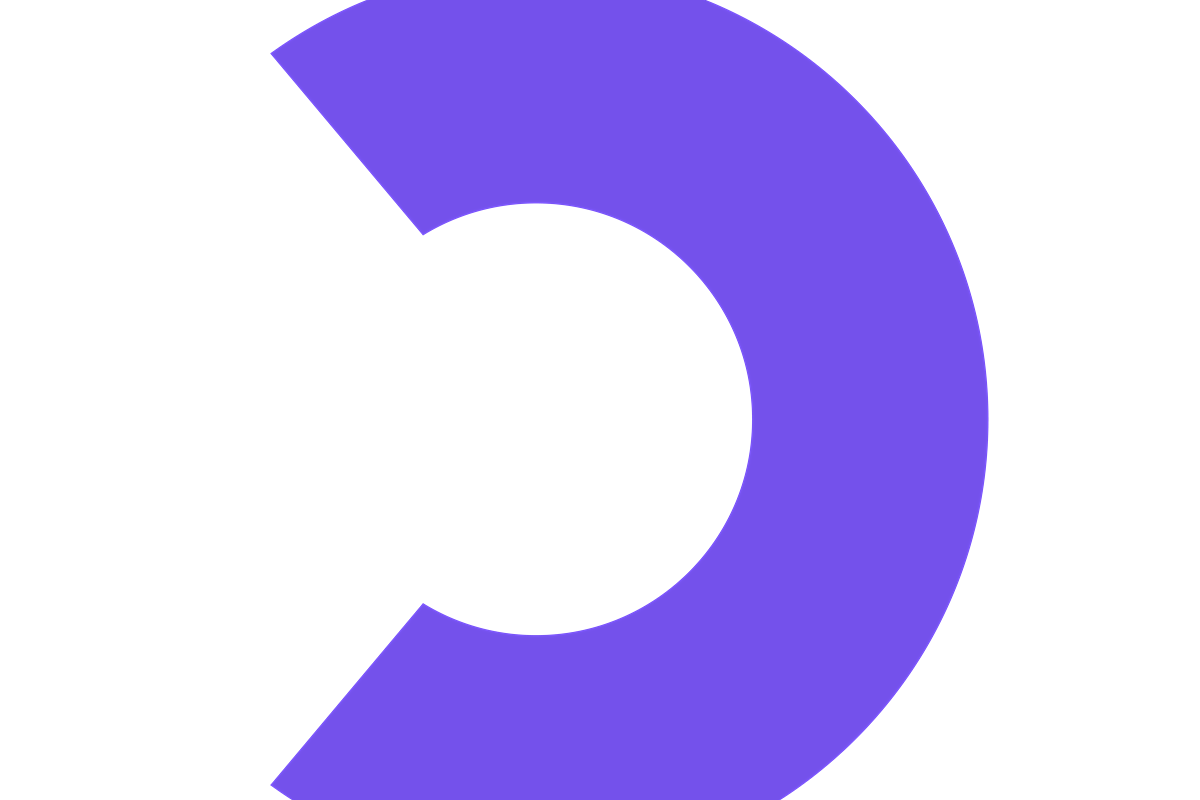

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

from utils import *

# File system manangement
import os
import gc
import time

from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

# Importing and describing dataset

 A breaf explanation of the data and it's organization in different files can be seen in the following image:
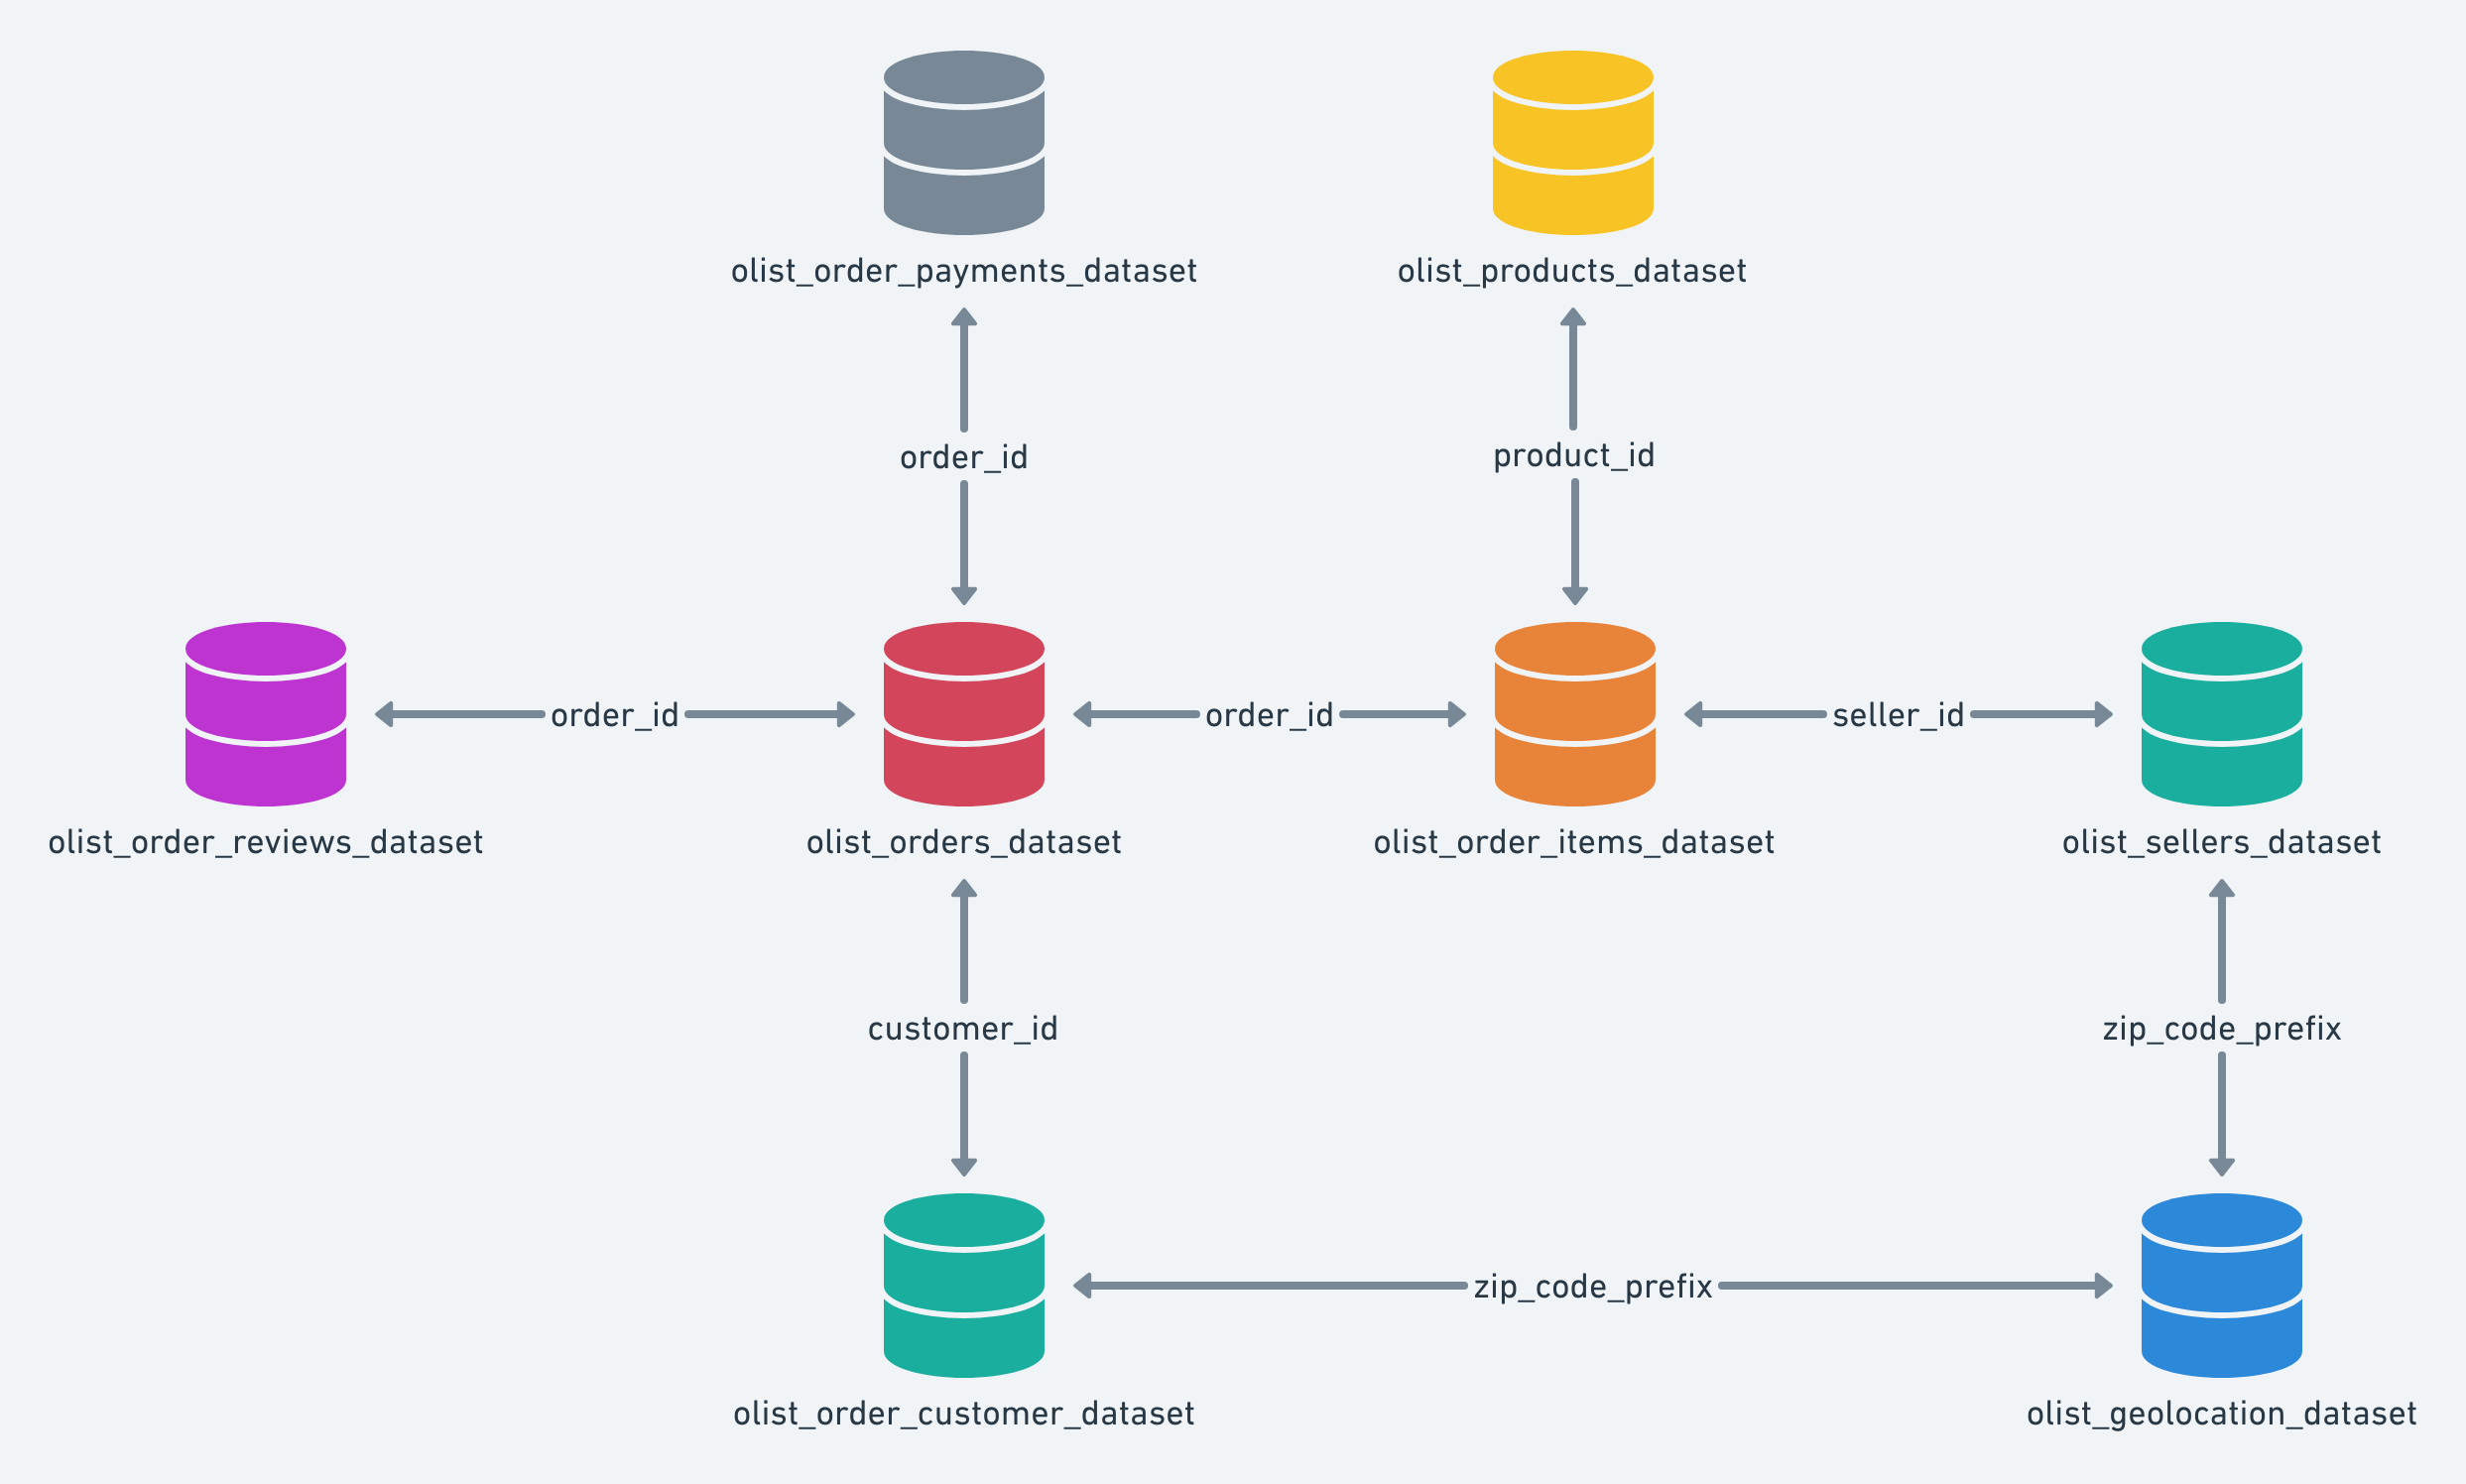

Know we list the different files in our data folder. 

In [2]:
# List files available
for file in os.listdir("data/"):
    if (file!='.DS_Store') & (file!='HRhd2Y0.png'):
        print(file)

olist_sellers_dataset.csv
product_category_name_translation.csv
olist_orders_dataset.csv
olist_order_items_dataset.csv
olist_customers_dataset.csv
df_clients.csv
olist_geolocation_dataset.csv
olist_order_payments_dataset.csv
olist_order_reviews_dataset.csv
olist_products_dataset.csv


There are 9 files, 8 datasets and product_category_name_translation.csv, that we will see in future what it contains. Know load the files in dataframes.

In [3]:
olist_customers_dataset = pd.read_csv('data/olist_customers_dataset.csv')
olist_sellers_dataset = pd.read_csv('data/olist_sellers_dataset.csv')
olist_order_reviews_dataset = pd.read_csv('data/olist_order_reviews_dataset.csv')
olist_order_items_dataset = pd.read_csv('data/olist_order_items_dataset.csv')
olist_products_dataset = pd.read_csv('data/olist_products_dataset.csv')
olist_geolocation_dataset = pd.read_csv('data/olist_geolocation_dataset.csv')
product_category_name_translation = pd.read_csv('data/product_category_name_translation.csv')
olist_orders_dataset = pd.read_csv('data/olist_orders_dataset.csv')
olist_order_payments_dataset = pd.read_csv('data/olist_order_payments_dataset.csv')

Describing the obtained data frames

In [4]:
datasets = [olist_customers_dataset,
            olist_sellers_dataset,
            olist_order_reviews_dataset,
            olist_order_items_dataset,
            olist_products_dataset,
            olist_geolocation_dataset,
            product_category_name_translation,
            olist_orders_dataset,
            olist_order_payments_dataset]
titles = ["customers",
          "sellers",
          "reviews",
          "items", 
          "products",
          "geolocations", 
          "category_translation",
          "payments", 
          "orders"]

info_df = pd.DataFrame({},)
info_df['dataset']= titles

info_df['no_of_columns']= [len(df.columns) for df in datasets ]
info_df['columns_name']= [', '.join(list(df.columns)) for df in datasets] 
info_df['no_of_rows'] = [len(df) for df in datasets]

info_df.style.background_gradient(cmap='Blues')

,dataset,no_of_columns,columns_name,no_of_rows
0,customers,5,"customer_id, customer_unique_id, customer_zip_code_prefix, customer_city, customer_state",99441
1,sellers,4,"seller_id, seller_zip_code_prefix, seller_city, seller_state",3095
2,reviews,7,"review_id, order_id, review_score, review_comment_title, review_comment_message, review_creation_date, review_answer_timestamp",99224
3,items,7,"order_id, order_item_id, product_id, seller_id, shipping_limit_date, price, freight_value",112650
4,products,9,"product_id, product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm",32951
5,geolocations,5,"geolocation_zip_code_prefix, geolocation_lat, geolocation_lng, geolocation_city, geolocation_state",1000163
6,category_translation,2,"product_category_name, product_category_name_english",71
7,payments,8,"order_id, customer_id, order_status, order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date",99441
8,orders,5,"order_id, payment_sequential, payment_type, payment_installments, payment_value",103886


In [5]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

new_df = pd.DataFrame({},)
new_df['dataset']= titles
new_df['numeric_features'] = [len((df.select_dtypes(include=numerics)).columns) for df in datasets]
new_df['num_features_name'] = [', '.join(list((df.select_dtypes(include=numerics)).columns)) for df in datasets]
new_df['object_features'] = [len((df.select_dtypes(include='object')).columns) for df in datasets]
new_df['objt_features_name'] = [', '.join(list((df.select_dtypes(include='object')).columns)) for df in datasets]
new_df['bool_features'] = [len((df.select_dtypes(include='bool')).columns) for df in datasets]
new_df.style.background_gradient(cmap='Blues')

,dataset,numeric_features,num_features_name,object_features,objt_features_name,bool_features
0,customers,1,customer_zip_code_prefix,4,"customer_id, customer_unique_id, customer_city, customer_state",0
1,sellers,1,seller_zip_code_prefix,3,"seller_id, seller_city, seller_state",0
2,reviews,1,review_score,6,"review_id, order_id, review_comment_title, review_comment_message, review_creation_date, review_answer_timestamp",0
3,items,3,"order_item_id, price, freight_value",4,"order_id, product_id, seller_id, shipping_limit_date",0
4,products,7,"product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm",2,"product_id, product_category_name",0
5,geolocations,3,"geolocation_zip_code_prefix, geolocation_lat, geolocation_lng",2,"geolocation_city, geolocation_state",0
6,category_translation,0,,2,"product_category_name, product_category_name_english",0
7,payments,0,,8,"order_id, customer_id, order_status, order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date",0
8,orders,3,"payment_sequential, payment_installments, payment_value",2,"order_id, payment_type",0


In [6]:
new_df.isnull().sum()

dataset               0
numeric_features      0
num_features_name     0
object_features       0
objt_features_name    0
bool_features         0
dtype: int64

Regarding the missing values in the datasets

In [7]:
print('olist_customers_dataset')
missing_values_table(olist_customers_dataset)
print('olist_sellers_dataset')
missing_values_table(olist_sellers_dataset)
print('olist_order_reviews_dataset')
missing_values_table(olist_order_reviews_dataset)
print('olist_order_items_dataset')
missing_values_table(olist_order_items_dataset)
print('olist_products_dataset')
missing_values_table(olist_products_dataset)
print('olist_geolocation_dataset')
missing_values_table(olist_geolocation_dataset)
print('product_category_name_translation')
missing_values_table(product_category_name_translation)
print('olist_orders_dataset')
missing_values_table(olist_orders_dataset)
print('olist_order_payments_dataset')
missing_values_table(olist_order_payments_dataset)

olist_customers_dataset
Your selected dataframe has 5 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


olist_sellers_dataset
Your selected dataframe has 4 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


olist_order_reviews_dataset
Your selected dataframe has 7 columns.
There are 2 columns that have missing values.


,Missing Values,% of Total Values
review_comment_title,87656,88.3
review_comment_message,58247,58.7


olist_order_items_dataset
Your selected dataframe has 7 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


olist_products_dataset
Your selected dataframe has 9 columns.
There are 8 columns that have missing values.


,Missing Values,% of Total Values
product_category_name,610,1.9
product_name_lenght,610,1.9
product_description_lenght,610,1.9
product_photos_qty,610,1.9
product_weight_g,2,0.0
product_length_cm,2,0.0
product_height_cm,2,0.0
product_width_cm,2,0.0


olist_geolocation_dataset
Your selected dataframe has 5 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


product_category_name_translation
Your selected dataframe has 2 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


olist_orders_dataset
Your selected dataframe has 8 columns.
There are 3 columns that have missing values.


,Missing Values,% of Total Values
order_delivered_customer_date,2965,3.0
order_delivered_carrier_date,1783,1.8
order_approved_at,160,0.2


olist_order_payments_dataset
Your selected dataframe has 5 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


Observe the following 3 datasets contains missing values: ***olist_order_reviews_dataset, olist_products_dataset, olist_orders_dataset***

First we start to regard how it looks the olist_customers_dataset comprising the following features:

 - customer_id: key to the orders dataset. Each order has a unique customer_id.
 - customer_unique_id: unique identifier of a customer. We need to say that here each order is assigned to a customer_id, meaning the same customer has different ids for different orders.
 - customer_zip_code_prefix: first five digits of customer zip code.
 - customer_city: customer city name.
 - customer_state: customer state.

In [8]:
olist_customers_dataset.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [9]:
olist_customers_dataset.shape

(99441, 5)

There are 2 id columns and other 3 columns that we analyse next.

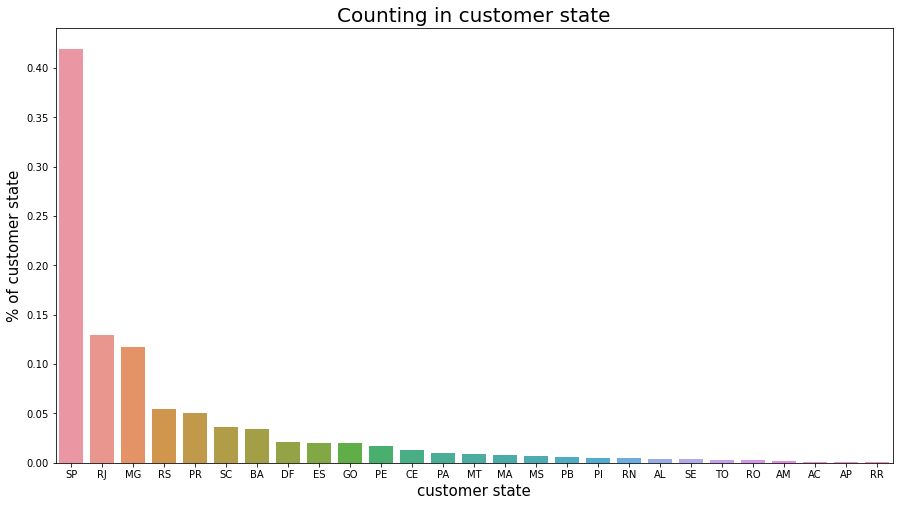

In [10]:
plot_count_col(olist_customers_dataset, col= 'customer_state', label_col='customer state')

In [11]:
len(olist_customers_dataset.customer_state.unique())

27

As we can see, the most number of customer come from state code `SP`, followed by `RJ` and `MG`, which are all situated in the SouthEast region of Brazil.

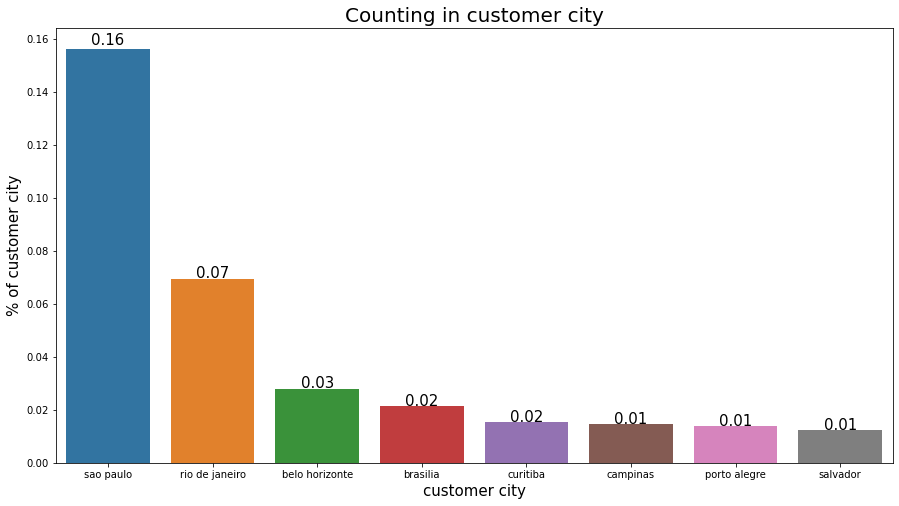

In [12]:
plot_count_col(olist_customers_dataset, col= 'customer_city', label_col='customer city', top=8, show_val=True)

Next we regard how it looks the olist_sellers_dataset.

In [13]:
olist_sellers_dataset.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [14]:
olist_sellers_dataset.shape

(3095, 4)

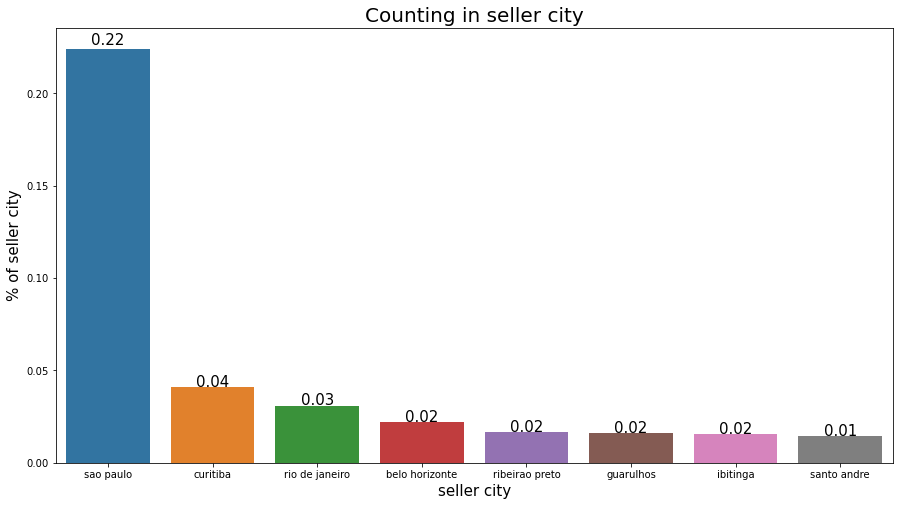

In [15]:
plot_count_col(olist_sellers_dataset, col= 'seller_city', label_col='seller city', top=8, show_val=True)

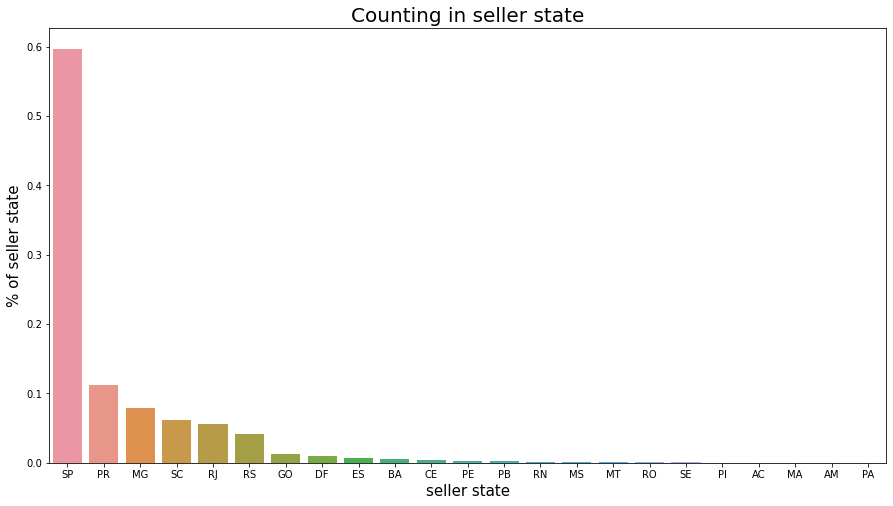

In [16]:
plot_count_col(olist_sellers_dataset, col= 'seller_state', label_col='seller state', show_val=False)

Next we regard how it looks the olist_orders_dataset that contains the following features:

 - order_id: unique identifier of the order.
 - customer_id: key to the customer dataset. Each order has a unique customer_id.
 - order_status: reference to the order status (delivered, shipped, etc).
 - order_purchase_timestamp: shows the purchase timestamp.
 - order_approved_at: shows the payment approval timestamp.
 - order_delivered_carrier_date: shows the order posting timestamp. When it was handled to the logistic partner.
 - order_delivered_customer_date: shows the actual order delivery date to the customer.
 - order_estimated_delivery date: shows the estimated delivery date that was informed to customer at the purchase moment.

In [17]:
olist_orders_dataset.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [18]:
olist_orders_dataset.shape

(99441, 8)

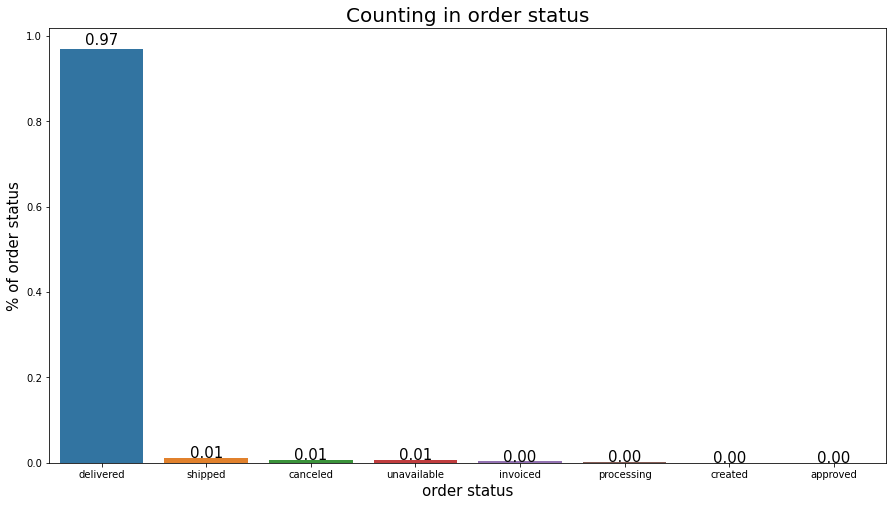

In [19]:
plot_count_col(olist_orders_dataset, col= 'order_status', label_col='order status', show_val=True)

The reviews dataset with the following features:
 - review_id: unique review identifier.
 - order_id: unique order identifier.
 - review_score: note ranging from 1 to 5 given by the customer on a satisfaction survey.
 - review_comment_title: comment title from the review left by the customer, in Portuguese.
 - review_comment_message: comment message from the review left by the customer, in Portuguese.
 - review_creation_date: shows the date in which the satisfaction survey was sent to the customer.
 - review_answer_timestamp: shows satisfaction survey answer timestamp.
 
is now analysed.

In [20]:
olist_order_reviews_dataset.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [21]:
olist_order_reviews_dataset.shape

(99224, 7)

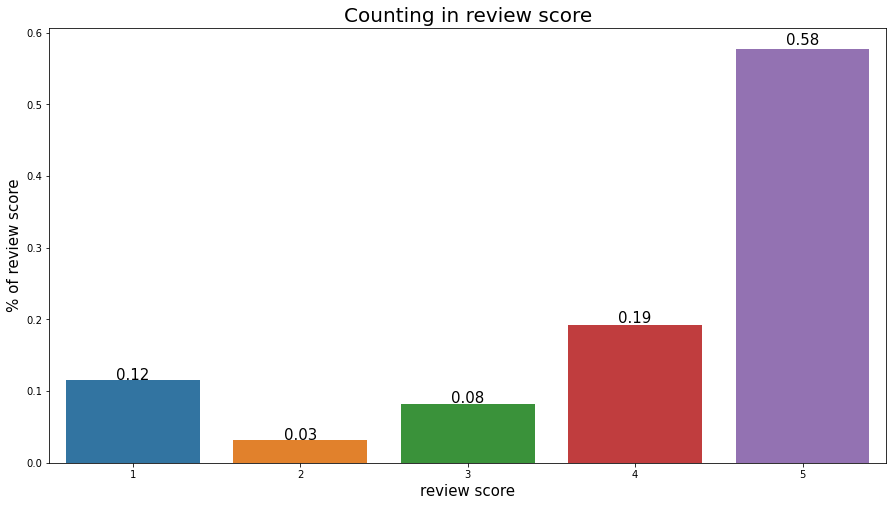

In [22]:
plot_count_col(olist_order_reviews_dataset, col= 'review_score', label_col='review score', show_val=True)

We can see, most customers are satisfied with the service and have given 4 and 5 ratings accordingly. 
However we can see many customers have given a raitng of 1, which means that they are dissapointed with the service.

Your selected dataframe has 7 columns.
There are 2 columns that have missing values.


,Missing Values,% of Total Values
review_comment_title,87656,88.3
review_comment_message,58247,58.7


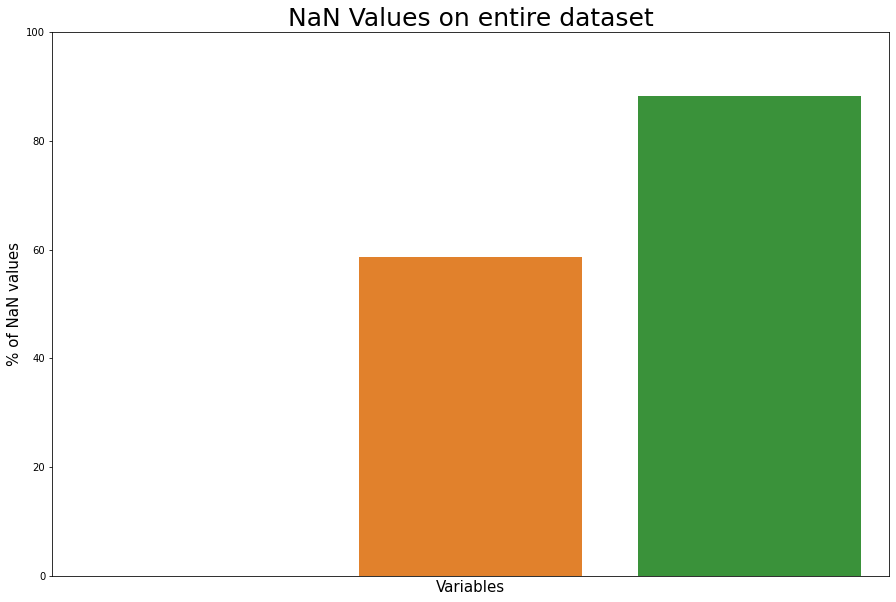

In [23]:
plot_nan_in_pourcent_from_data(olist_order_reviews_dataset)
# Missing values statistics
missing_values = missing_values_table(olist_order_reviews_dataset)
missing_values.head()

In [24]:
olist_order_items_dataset.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [25]:
olist_order_items_dataset.shape

(112650, 7)

The product dataset with the following 9 features is also analysed:

 - product_id: unique product identifier.
 - product_category_head: root category of product, in Portuguese..
 - product_name_length: number of characters extracted from the product name.
 - product_description_lenght: number of characters extracted from the product description.
 - product_photos_qty: number of product published photos.
 - product_weight_g: product weight measured in grams.
 - product_length_cm: product length measured in centimeters.
 - product height_cm: product height measured in centimeters.
 - product_width_cm: product width measured in centimeters.

In [26]:
olist_products_dataset.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [27]:
olist_products_dataset.shape

(32951, 9)

Your selected dataframe has 9 columns.
There are 8 columns that have missing values.


,Missing Values,% of Total Values
product_category_name,610,1.9
product_name_lenght,610,1.9
product_description_lenght,610,1.9
product_photos_qty,610,1.9
product_weight_g,2,0.0


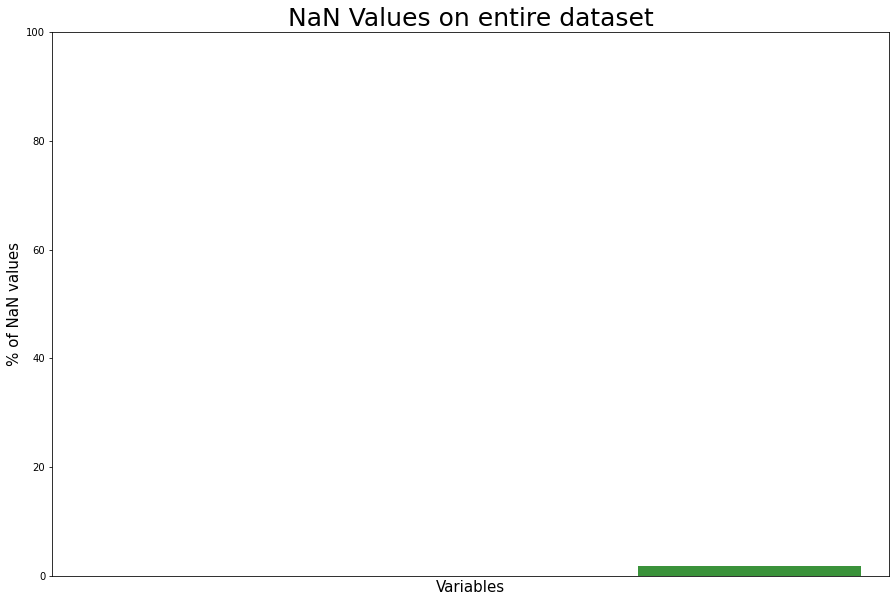

In [28]:
plot_nan_in_pourcent_from_data(olist_products_dataset)
# Missing values statistics
missing_values = missing_values_table(olist_products_dataset)
missing_values.head()

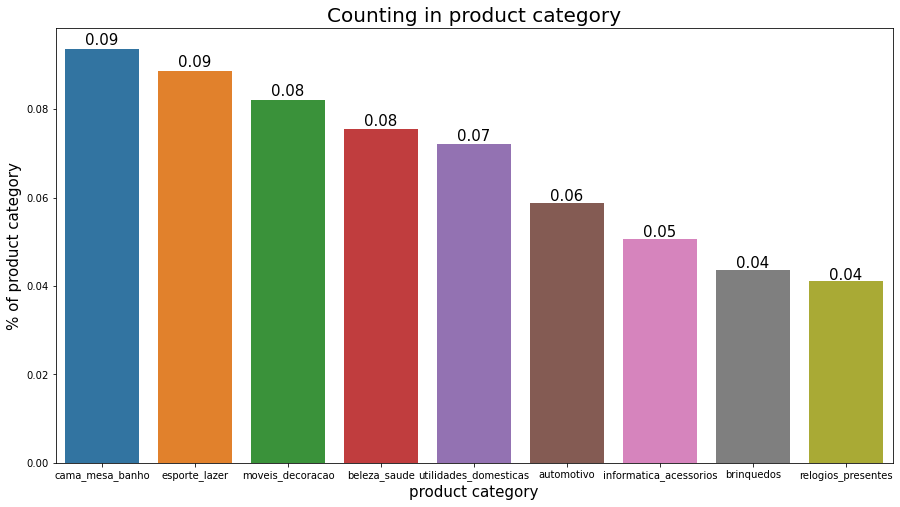

In [29]:
plot_count_col(olist_products_dataset, col= 'product_category_name', label_col='product category', top=9, show_val=True)

In [30]:
olist_products_dataset.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


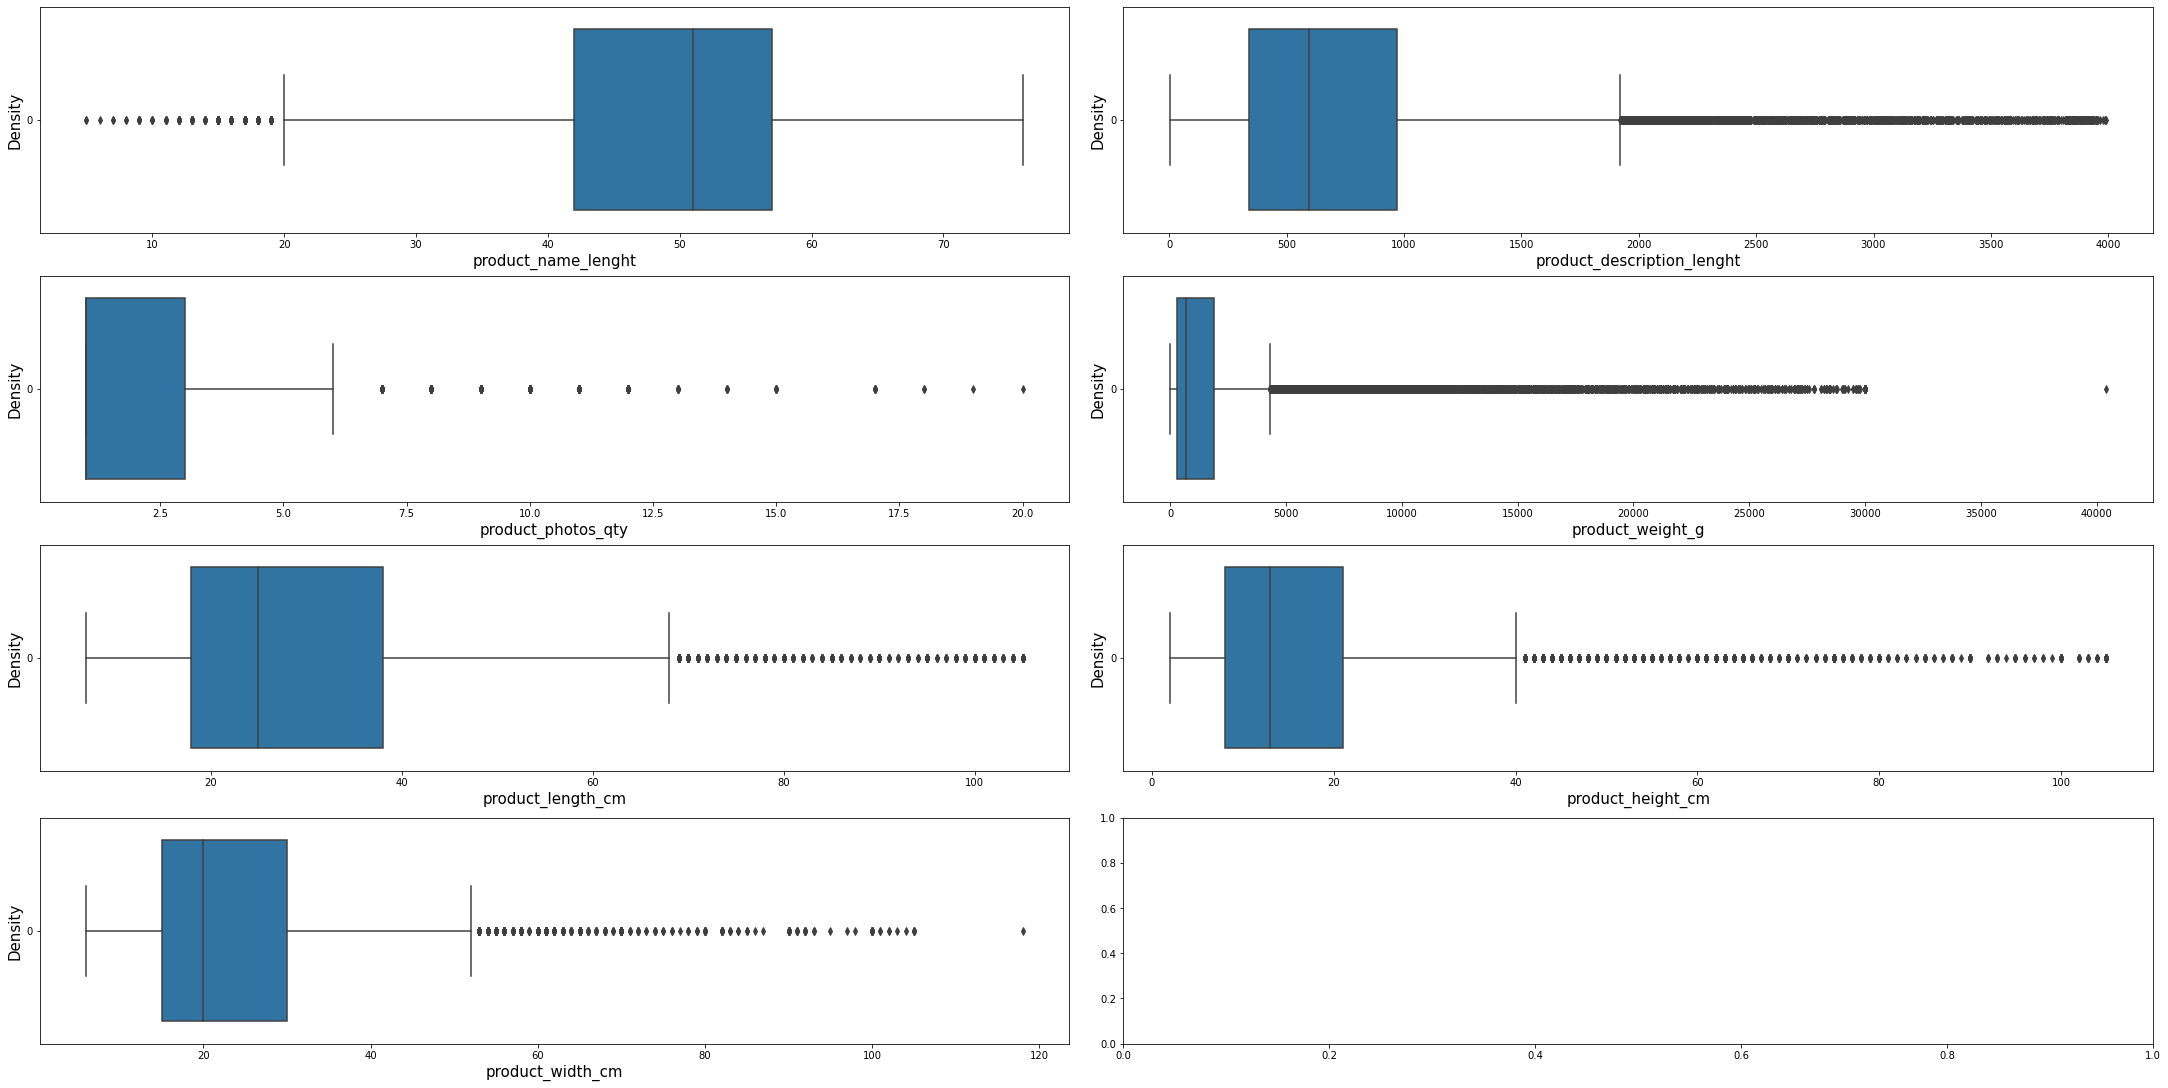

In [31]:
cols = ['product_name_lenght', 'product_description_lenght', 'product_photos_qty', 
        'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']
plot_density(olist_products_dataset, columns = cols, dt = DensityTypes.Boxplot)

Know see the geolocation dataset with the following feature:
 - geolocation_zip_code_prefix: first 5 digits of zip code.
 - geolocation_lat: latitude
 - geolocation_lng: longitude
 - geolocation_city: city
 - geolocation_state state

In [32]:
olist_geolocation_dataset.head()
olist_geolocation_dataset.shape

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


(1000163, 5)

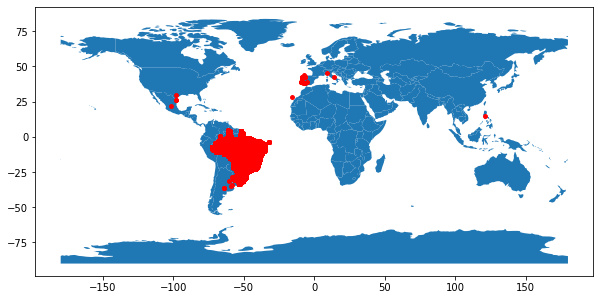

In [31]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

geometry = [Point(xy) for xy in zip(olist_geolocation_dataset['geolocation_lng'], olist_geolocation_dataset['geolocation_lat'])]
gdf = GeoDataFrame(olist_geolocation_dataset, geometry=geometry)   

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15, figsize=(15,8));

We can see, most of the orders come from Brazilian cities, however, there are a few orders which come from North America, Europe, and Asia.

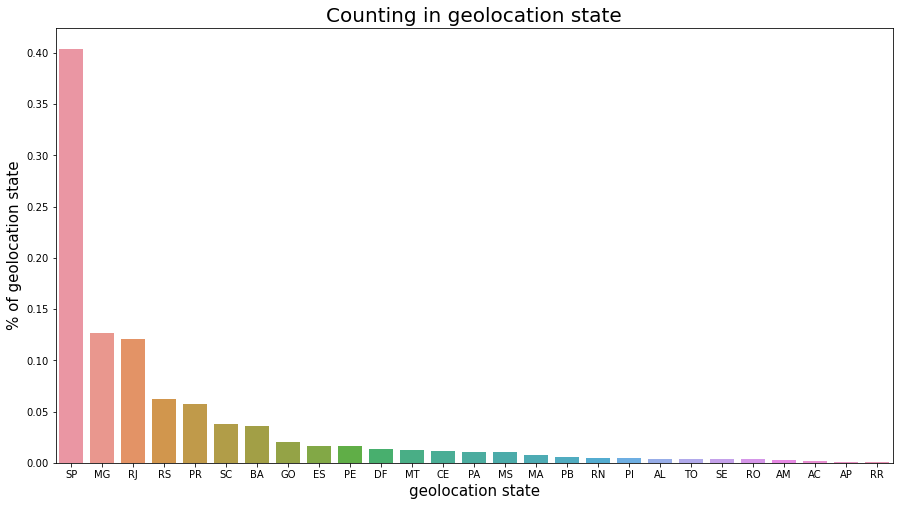

In [33]:
plot_count_col(olist_geolocation_dataset, col= 'geolocation_state', label_col='geolocation state')

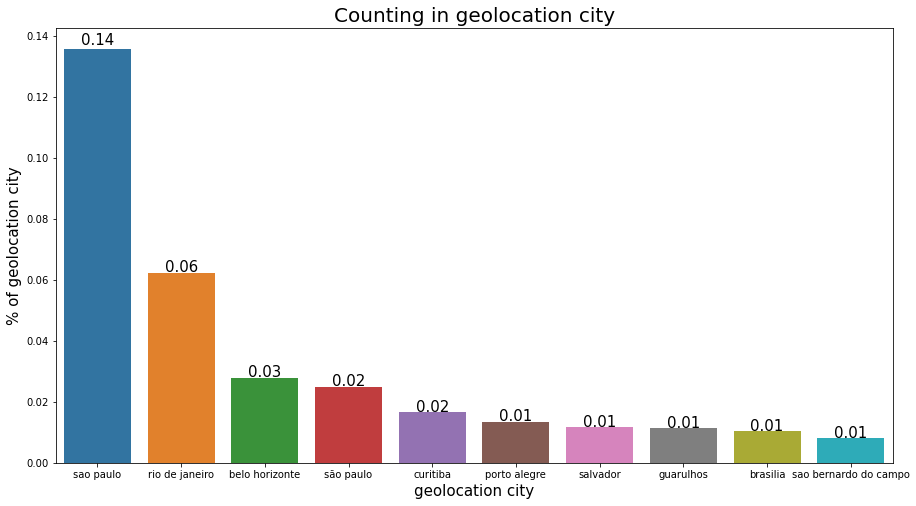

In [34]:
plot_count_col(olist_geolocation_dataset, col= 'geolocation_city', label_col='geolocation city', top=10, show_val=True)

In [35]:
product_category_name_translation.head()
product_category_name_translation.shape

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


(71, 2)

And the payments dataset: 
 - order_id: unique identifier of an order.
 - payment_sequential: a customer may pay an order with more than one payment method. If he does so, a sequence will be created.
 - payment_type: method of payment chosen by the customer.
 - payment_installments: number of installments chosen by the customer.
 - payment_value: transaction value.

In [36]:
olist_order_payments_dataset.head()
olist_order_payments_dataset.shape

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


(103886, 5)

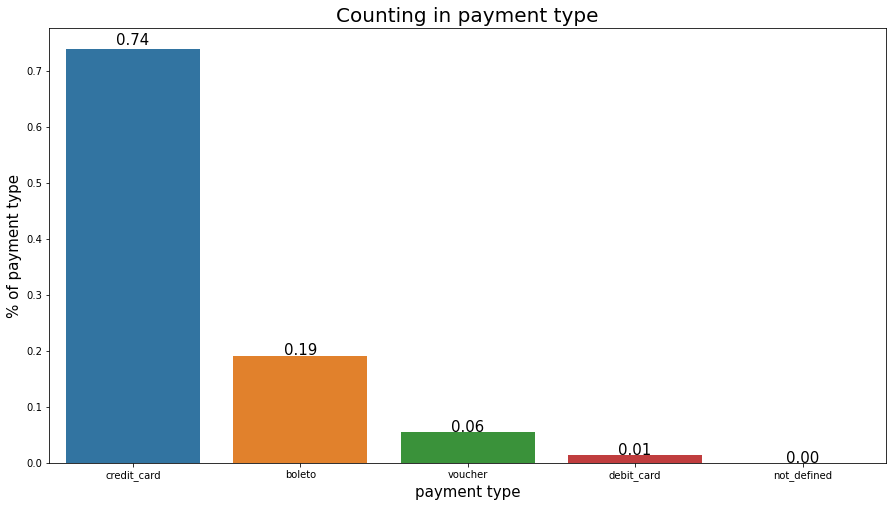

In [37]:
plot_count_col(olist_order_payments_dataset, col= 'payment_type', label_col='payment type', show_val=True)

In [38]:
olist_order_payments_dataset.nunique()

order_id                99440
payment_sequential         29
payment_type                5
payment_installments       24
payment_value           29077
dtype: int64

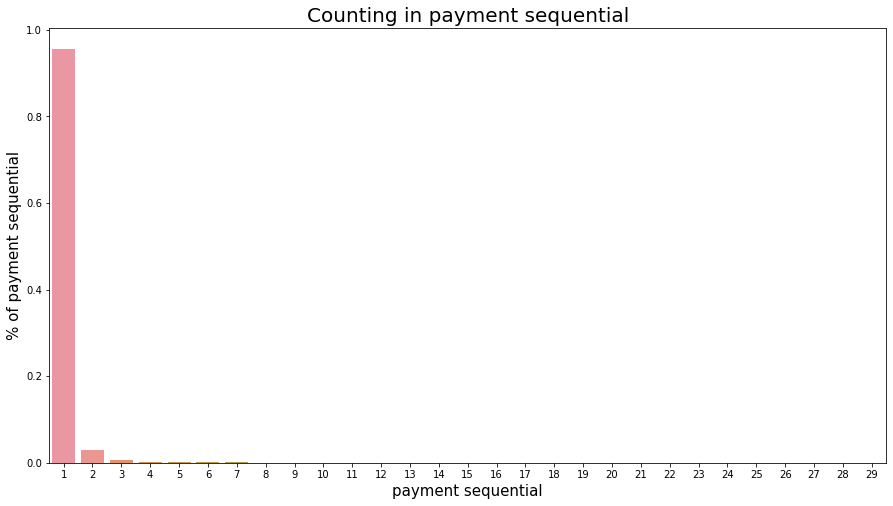

In [39]:
plot_count_col(olist_order_payments_dataset, col= 'payment_sequential', label_col='payment sequential', show_val=False)

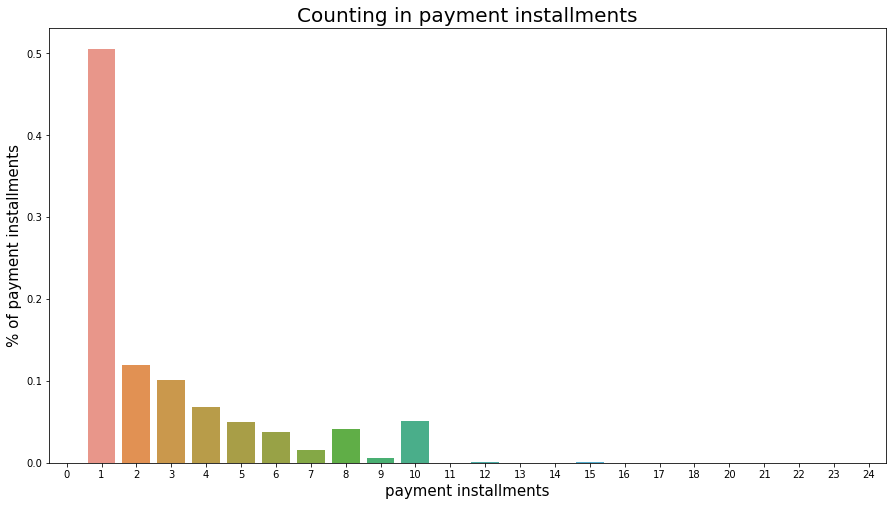

In [40]:
plot_count_col(olist_order_payments_dataset, col= 'payment_installments', label_col='payment installments', show_val=False)

In [41]:
olist_order_payments_dataset[olist_order_payments_dataset.payment_installments==0]

,order_id,payment_sequential,payment_type,payment_installments,payment_value
46982,744bade1fcf9ff3f31d860ace076d422,2,credit_card,0,58.69
79014,1a57108394169c0b47d8f876acc9ba2d,2,credit_card,0,129.94


Theese values with 0 installments seem strange for me, therefore I prefer to delete them in cleaning the datasets.

# Cleaning the datasets

First we can look for some duplicates.
Starting with `olist_order_items_dataset` dataset we observe:

In [42]:
olist_order_items_dataset[olist_order_items_dataset[['order_id', 'product_id', 'seller_id', 'shipping_limit_date', 'price', 'freight_value']].duplicated()]
olist_order_items_dataset[olist_order_items_dataset.order_id == '0008288aa423d2a3f00fcb17cd7d8719']

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
14,0008288aa423d2a3f00fcb17cd7d8719,2,368c6c730842d78016ad823897a372db,1f50f920176fa81dab994f9023523100,2018-02-21 02:55:52,49.90,13.37
33,00143d0f86d6fbd9f9b38ab440ac16f5,2,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.10
34,00143d0f86d6fbd9f9b38ab440ac16f5,3,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.10
43,001ab0a7578dd66cd4b0a71f5b6e1e41,2,0b0172eb0fd18479d29c3bc122c058c2,5656537e588803a555b8eb41f07a944b,2018-01-04 02:33:42,24.89,17.63
44,001ab0a7578dd66cd4b0a71f5b6e1e41,3,0b0172eb0fd18479d29c3bc122c058c2,5656537e588803a555b8eb41f07a944b,2018-01-04 02:33:42,24.89,17.63
...,...,...,...,...,...,...,...
112617,ffecd5a79a0084f6a592288c67e3c298,3,50fd2b788dc166edd20512370dac54df,8b321bb669392f5163d04c59e235e066,2018-03-05 20:15:27,21.90,15.79
112635,fff8287bbae429a99bb7e8c21d151c41,2,bee2e070c39f3dd2f6883a17a5f0da45,4e922959ae960d389249c378d1c939f5,2018-03-27 12:29:22,180.00,48.14
112641,fffb9224b6fc7c43ebb0904318b10b5f,2,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2017-11-03 02:55:58,55.00,34.19
112642,fffb9224b6fc7c43ebb0904318b10b5f,3,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2017-11-03 02:55:58,55.00,34.19


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
13,0008288aa423d2a3f00fcb17cd7d8719,1,368c6c730842d78016ad823897a372db,1f50f920176fa81dab994f9023523100,2018-02-21 02:55:52,49.9,13.37
14,0008288aa423d2a3f00fcb17cd7d8719,2,368c6c730842d78016ad823897a372db,1f50f920176fa81dab994f9023523100,2018-02-21 02:55:52,49.9,13.37


This data contains clearly duplicates and need to be cleaned, keeping the last values.

In [43]:
olist_order_items_dataset.shape

(112650, 7)

In [44]:
olist_order_items_dataset = olist_order_items_dataset.drop_duplicates(['order_id', 'product_id', 'seller_id', 'shipping_limit_date', 'price', 'freight_value'], keep='last')

In [45]:
olist_order_items_dataset.shape

(102425, 7)

Observe that more about 10000 values were deleted being considered as duplicates in this dataset. Verifying other datasets we have not noticed some duplicates.

We observe nan values in `olist_products_dataset` more preciselly in `product_category_name`, `product_name_lenght`, `product_description_lenght`, `product_photos_qty` with 610 nan values that consists 1.9% of nan values. `product_weight_g` has 2 values of nans. I will remove this data observations.

In [46]:
olist_products_dataset = olist_products_dataset.dropna()

Also an english translation for `product_categories_name` is made for more coprehension. But first we add two values that does not contain translation in the translation dataset.

In [47]:
new_row1 = {'product_category_name':'pc_gamer', 'product_category_name_english':'pc_gamer'}
new_row2 = {'product_category_name':'portateis_cozinha_e_preparadores_de_alimentos', 'product_category_name_english':'kitchen_food_preparators'}
#append row to the dataframe
product_category_name_translation = product_category_name_translation.append(new_row1, ignore_index=True)
product_category_name_translation = product_category_name_translation.append(new_row2, ignore_index=True)
del new_row1, new_row2

In [48]:
dict_translation = product_category_name_translation.T.to_dict()
new_transl = {}
for d in dict_translation.keys():
    es = dict_translation[d]['product_category_name']
    en = dict_translation[d]['product_category_name_english']
    new_transl[es] = en

In [49]:
olist_products_dataset['product_category_name_en'] = olist_products_dataset['product_category_name'].map(new_transl)
del product_category_name_translation

/opt/anaconda3/envs/oc4/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [50]:
olist_products_dataset[olist_products_dataset['product_category_name_en'].isna()][['product_category_name', 'product_category_name_en']]

,product_category_name,product_category_name_en


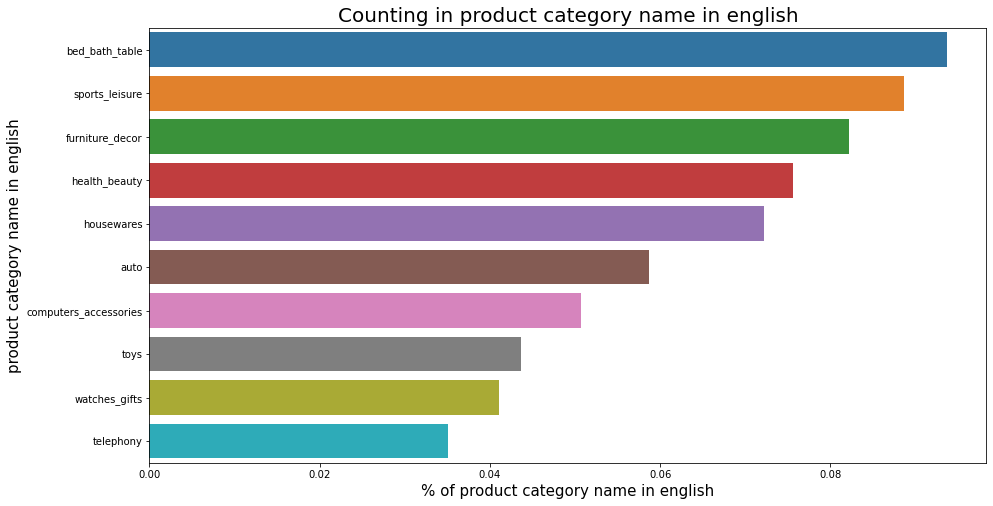

In [51]:
plot_count_col(olist_products_dataset, col= 'product_category_name_en', label_col='product category name in english', show_val=False, on_x=False, top=10)

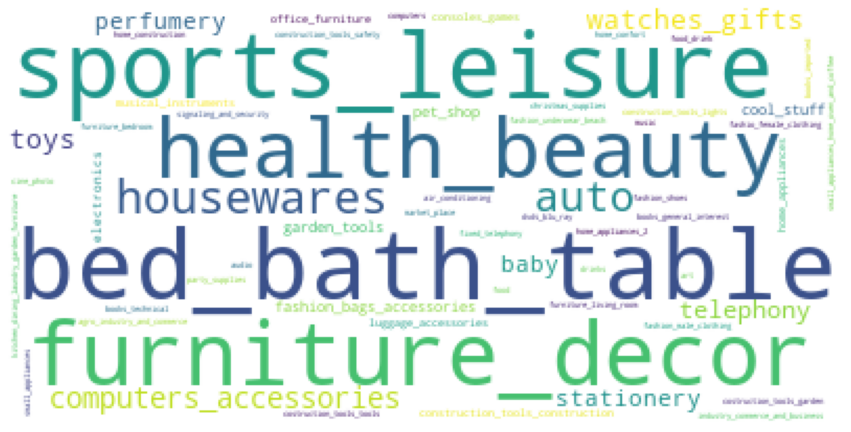

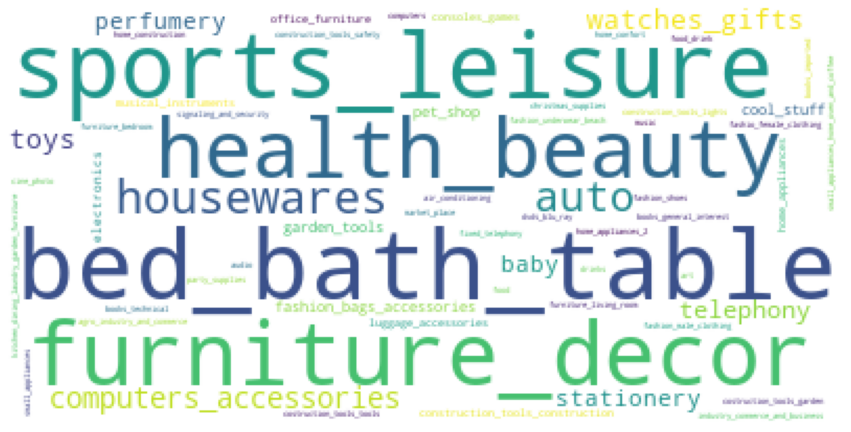

In [52]:
plot_words(olist_products_dataset, 'product_category_name_en')

In [53]:
olist_products_dataset.product_category_name_en.unique()

array(['perfumery', 'art', 'sports_leisure', 'baby', 'housewares',
       'musical_instruments', 'cool_stuff', 'furniture_decor',
       'home_appliances', 'toys', 'bed_bath_table',
       'construction_tools_safety', 'computers_accessories',
       'health_beauty', 'luggage_accessories', 'garden_tools',
       'office_furniture', 'auto', 'electronics', 'fashion_shoes',
       'telephony', 'stationery', 'fashion_bags_accessories', 'computers',
       'home_construction', 'watches_gifts',
       'construction_tools_construction', 'pet_shop', 'small_appliances',
       'agro_industry_and_commerce', 'furniture_living_room',
       'signaling_and_security', 'air_conditioning', 'consoles_games',
       'books_general_interest', 'costruction_tools_tools',
       'fashion_underwear_beach', 'fashion_male_clothing',
       'kitchen_dining_laundry_garden_furniture',
       'industry_commerce_and_business', 'fixed_telephony',
       'construction_tools_lights', 'books_technical',
       'home_app

In [54]:
categories ={
    'electronics' : ['pc_gamer', 'kitchen_food_preparators', 'small_appliances_home_oven_and_coffee', 'tablets_printing_image', 'computers_accessories', 'electronics', 'telephony', 'stationery', 'computers', 'consoles_games', 'fixed_telephony'],
    'personal_care' : ['diapers_and_hygiene', 'perfumery', 'health_beauty'],
    'home_layout': ['furniture_mattress_and_upholstery', 'home_comfort_2', 'flowers', 'furniture_bedroom', 'home_confort', 'arts_and_craftmanship', 'art', 'furniture_decor', 'home_appliances', 'bed_bath_table', 'furniture_living_room', 'air_conditioning', 'kitchen_dining_laundry_garden_furniture', 'home_appliances_2'],
    'security': ['security_and_services', 'signaling_and_security'],
    'dressing' : ['fashion_childrens_clothes', 'fashion_sport', 'fashio_female_clothing', 'sports_leisure', 'housewares', 'fashion_shoes', 'fashion_bags_accessories', 'watches_gifts', 'fashion_underwear_beach', 'fashion_male_clothing'],
    'baby' : ['baby', 'toys'],
    'hobies_learn' : ['cds_dvds_musicals', 'cine_photo', 'dvds_blu_ray', 'books_imported', 'music', 'audio', 'musical_instruments', 'cool_stuff', 'books_general_interest', 'books_technical'],
    'tools' : [ 'costruction_tools_garden', 'construction_tools_safety', 'garden_tools', 'home_construction', 'construction_tools_construction', 'small_appliances', 'costruction_tools_tools', 'construction_tools_lights'],
    'travel' : ['luggage_accessories'],
    'office' : ['office_furniture'],
    'auto' : ['auto'],
    'animals' : ['pet_shop'],
    'commerce': ['agro_industry_and_commerce', 'industry_commerce_and_business', 'party_supplies', 'drinks', 'market_place', 'la_cuisine', 'food_drink', 'food', 'christmas_supplies']
}

In [55]:
def replace(df, col, key, val):
    m = [v == key for v in df[col]]
    df.loc[m, col] = val
    return df

In [56]:
olist_products_dataset['my_categoty'] = olist_products_dataset['product_category_name_en'].str.lower();
for new_value, old_value in categories.items():
    olist_products_dataset['my_categoty'] = olist_products_dataset['my_categoty'].replace(old_value, new_value);

/opt/anaconda3/envs/oc4/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/anaconda3/envs/oc4/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [57]:
len(olist_products_dataset[olist_products_dataset['my_categoty'].isna()])

0

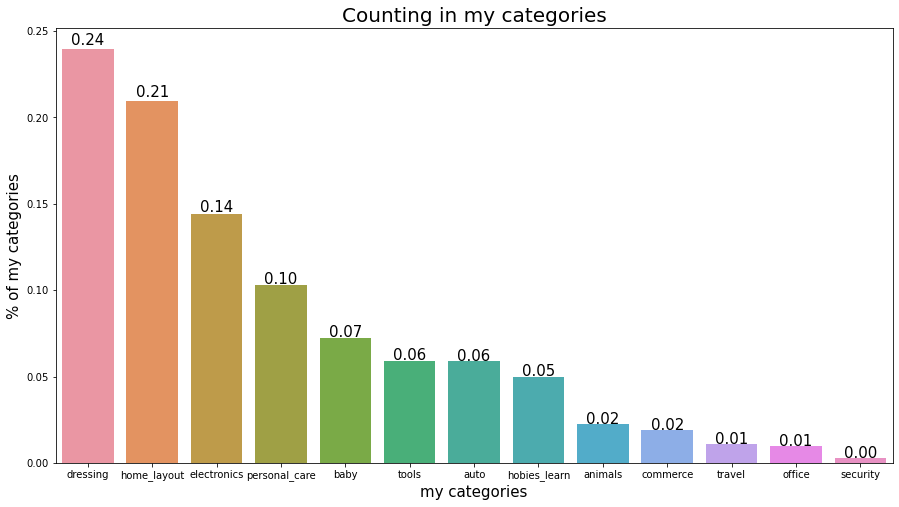

In [58]:
plot_count_col(olist_products_dataset, col= 'my_categoty', label_col='my categories', show_val=True, on_x=True)

We observed `olist_order_payments_datase`, has non defined `payment_type`, therefore we will eliminate theese values.

In [59]:
# removing not_defined payment method
olist_order_payments_dataset = olist_order_payments_dataset.loc[olist_order_payments_dataset['payment_type']!='not_defined', :]

In [60]:
olist_order_payments_dataset = olist_order_payments_dataset[olist_order_payments_dataset.payment_installments != 0]

We saw that `olist_order_reviews_datase` contains two columns with lots of nan values. We choose to eliminate theese columns.

In [61]:
# dropping columns with many missing values
olist_order_reviews_dataset = olist_order_reviews_dataset.drop(columns=['review_comment_title', 'review_comment_message'])

Take only the ordrers that were delivered.

In [62]:
olist_orders_dataset = olist_orders_dataset[olist_orders_dataset.order_status=='delivered']

We don't have lot of missing values in `olist_orders_dataset`, therefore we remove rows which have missing values using the dropna() function.

In [63]:
# dropping the missing values
olist_orders_dataset = olist_orders_dataset.dropna()

In [64]:
# convert date to datetime format
olist_orders_dataset[['order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date']] = olist_orders_dataset[['order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date']]\
        .apply(lambda x: pd.to_datetime(x,errors = 'coerce', format='%Y-%m-%d %H:%M:%S'))\
        .apply(lambda x: x.dt.date)\
        .astype('datetime64')

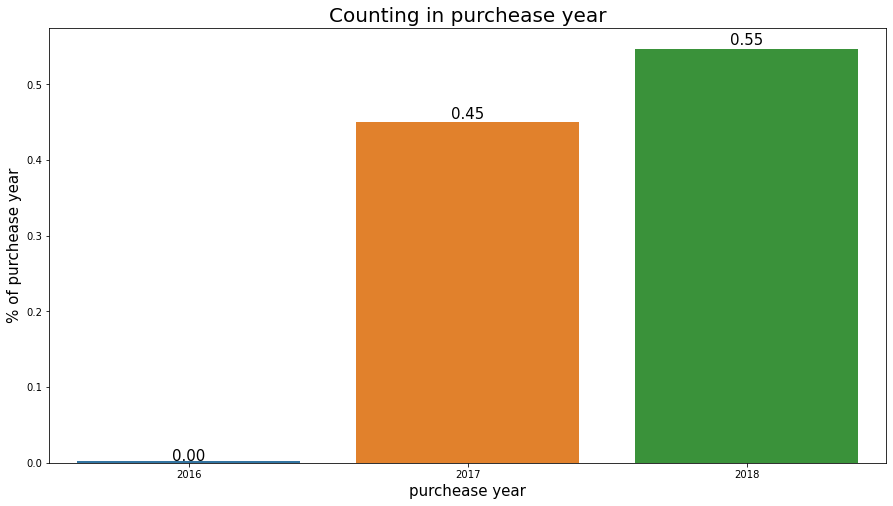

In [65]:
olist_orders_dataset['purchease_year'] = olist_orders_dataset.order_purchase_timestamp.dt.year
plot_count_col(olist_orders_dataset, col= 'purchease_year', label_col='purchease year', show_val=True)

In [66]:
olist_orders_dataset[olist_orders_dataset.purchease_year==2016]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,purchease_year
378,cbbb524a0e1646aa6cf7a3c0bbe517ad,dacb079d55ffb1d3955c5d923df3ebb7,delivered,2016-10-05,2016-10-06,2016-10-10,2016-10-16,2016-12-07,2016
699,ac2b7c522d811acba0aa270ed3e112e4,ef21aebbb093a6db29ccc6aa0b89c347,delivered,2016-10-05,2016-10-06,2016-10-10,2016-10-13,2016-11-29,2016
1384,7033745709b7cf1bac7d2533663592de,7f0ca17bb33b230b47459437cf0682c7,delivered,2016-10-04,2016-10-04,2016-10-08,2016-10-11,2016-11-30,2016
1449,5cd498954e2b37d71b315166809b4bd7,ff1a56726b7ea149c7423865609cc0c8,delivered,2016-10-07,2016-10-08,2016-10-25,2016-10-27,2016-12-01,2016
2335,dc5f6cd4492bbffe5bcda9b87856c9a5,2ebf822bbf33241c7bffb42235519f92,delivered,2016-10-05,2016-10-06,2016-10-21,2016-10-27,2016-11-29,2016
...,...,...,...,...,...,...,...,...,...
98322,6e0d2539e48e84296bae6290de41058c,1fc56719b52f82c03caddc5faf531fbb,delivered,2016-10-04,2016-10-06,2016-11-10,2016-11-17,2016-11-30,2016
98484,9d664ec86be69d869bb6870294c4fdd8,0a9ee4d9030acbe428769c79d0c4da69,delivered,2016-10-08,2016-10-08,2016-10-12,2016-10-31,2016-12-12,2016
99035,7e2dddf174cc4d2768bf39c43ab2bd7a,accfbaa1f092fdf6db1d8fcdad351b50,delivered,2016-10-09,2016-10-10,2016-11-03,2016-11-10,2016-12-02,2016
99248,e439ced3d48f1a77f6ecc029cc946a6f,e9c6723e04c4e53e7e9c3afe383f3866,delivered,2016-10-07,2016-10-07,2016-10-15,2016-10-25,2016-12-01,2016


A small number of purcheases are made in 2016, Therefore we will not consider theese data.

In [67]:
olist_orders_dataset = olist_orders_dataset[olist_orders_dataset.purchease_year!=2016]

# Feature engineering
Next, we engineer the following features:

 - diff_app_pur: the difference between the time the order was placed and the time it was approved in seconds
 - diff_car_app: the difference between the time the order was approved and the time the order was delivered to the logistic partner in days
 - diff_del_car: the time taken between when the order was delivered to the customer after the order was delivered to the logistic partner in days
 - diff_est_act: the difference between the estimated date of arrival and the actual date of arrival in days

Also regarding the RFM segmentation we can imagine some features like:
 - Recency : number of days after the last purchase of the client
 - Frequency : number of purchases of the customer
 - Monetary : average amount of customer purchases

Here Recency will be computed as 
 - diff_cust_pur: the difference between the time the order was made and the current date

In [68]:
from datetime import datetime as dt
olist_orders_dataset.loc[:,'diff_app_pur'] = (pd.to_datetime(olist_orders_dataset.order_approved_at) - pd.to_datetime(olist_orders_dataset.order_purchase_timestamp)).dt.seconds
olist_orders_dataset.loc[:,'diff_car_app'] = (pd.to_datetime(olist_orders_dataset.order_delivered_carrier_date) - pd.to_datetime(olist_orders_dataset.order_approved_at)).dt.days
olist_orders_dataset.loc[:,'diff_del_car'] = (pd.to_datetime(olist_orders_dataset.order_delivered_customer_date) - pd.to_datetime(olist_orders_dataset.order_delivered_carrier_date)).dt.days
olist_orders_dataset.loc[:,'diff_est_act'] = (pd.to_datetime(olist_orders_dataset.order_estimated_delivery_date) - pd.to_datetime(olist_orders_dataset.order_delivered_customer_date)).dt.days

from datetime import timedelta
last_date = olist_orders_dataset['order_purchase_timestamp'].max() + timedelta(days=1)
olist_orders_dataset.loc[:,'diff_cust_pur'] = (last_date - pd.to_datetime(olist_orders_dataset.order_purchase_timestamp)).dt.days

In [69]:
olist_orders_dataset.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,purchease_year,diff_app_pur,diff_car_app,diff_del_car,diff_est_act,diff_cust_pur
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02,2017-10-02,2017-10-04,2017-10-10,2017-10-18,2017,0,2,6,8,332
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24,2018-07-26,2018-07-26,2018-08-07,2018-08-13,2018,0,0,12,6,37
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08,2018-08-08,2018-08-08,2018-08-17,2018-09-04,2018,0,0,9,18,22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18,2017-11-18,2017-11-22,2017-12-02,2017-12-15,2017,0,4,10,13,285
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13,2018-02-13,2018-02-14,2018-02-16,2018-02-26,2018,0,1,2,10,198


In [70]:
ll = list(olist_sellers_dataset.seller_state.value_counts().head(10).index)
olist_sellers_dataset['seller_state_top10'] = olist_sellers_dataset['seller_state']
olist_sellers_dataset.loc[~(olist_sellers_dataset['seller_state_top10'].isin(ll)),'seller_state_top10'] = 'Other'

ll = list(olist_customers_dataset.customer_state.value_counts().head(10).index)
olist_customers_dataset['customer_state_top10'] = olist_customers_dataset['customer_state']
olist_customers_dataset.loc[~(olist_customers_dataset['customer_state_top10'].isin(ll)),'customer_state_top10'] = 'Other'

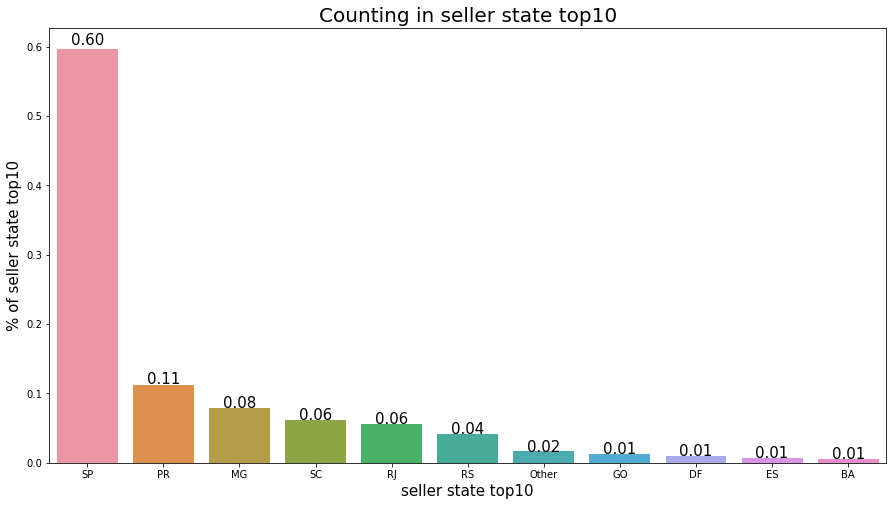

In [71]:
plot_count_col(olist_sellers_dataset, col= 'seller_state_top10', label_col='seller state top10', show_val=True)

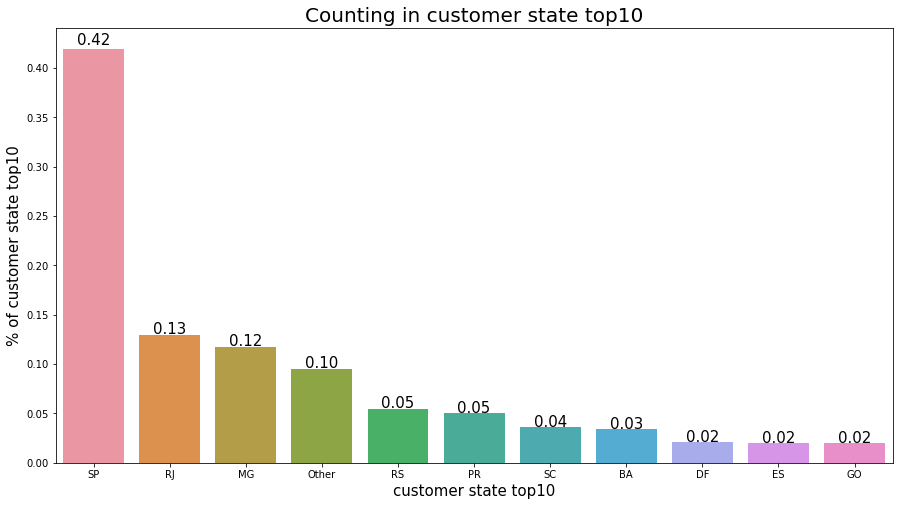

In [72]:
plot_count_col(olist_customers_dataset, col= 'customer_state_top10', label_col='customer state top10', show_val=True)

# Aggregation by `client_id_unique` and preparing dataset

## Merging the dataset

After exploring and performing preprocessing on the datasets individually, we merge the datasets using multiple merge functions and common keys from the database schema. We use the 'inner' join strategy to avoid any missing values.

In [73]:
df = pd.merge(olist_orders_dataset, olist_order_payments_dataset, on='order_id', how='inner')
df = df.merge(olist_order_reviews_dataset, on='order_id', how='inner')
df = df.merge(olist_customers_dataset, on='customer_id', how='inner')
df = df.merge(olist_order_items_dataset, on='order_id', how='inner')
df = df.merge(olist_products_dataset, on='product_id', how='inner')
df = df.merge(olist_sellers_dataset, on='seller_id', how='inner')
df = df.merge(olist_geolocation_dataset, left_on='customer_zip_code_prefix', right_on='geolocation_zip_code_prefix', how='inner')

Merging the dataset could cause some creation of dupplicates. So we clean the obtained dataset by removing the duplicates.

In [74]:
# dropping duplicate values
#cols = list(df.columns)
#cols.remove('geolocation_lat')
#cols.remove('geolocation_lng')
df = df.drop_duplicates(subset=['order_id', 'customer_id', 'review_id', 'order_item_id', 'product_id', 'seller_id'])

In [75]:
missing_values_table(df)

Your selected dataframe has 52 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


## Aggregation by `client_id_unique`

The dataset is know merged, and know we shall agregate it by `client_id_unique` in order to make the clients segmentation.

In [78]:
import scipy
bb_aggregations = {
    'product_id': ['count'], #number of buyed products
    'order_id': ['count'], #number of orders per client
    'payment_type': ['nunique'], # number of payment type
    'payment_type':  lambda x: scipy.stats.mode(x)[0], # payment le plus utilisé par le client
    'payment_value': ['sum', 'mean', 'max'], # La somme totale de payment par client et la moyenne de depesement par client
    'payment_sequential':['max'], # Sequential payment for a customer, what is the maximum number of the payment methods used in one order by the customer
    'payment_installments':['max', 'mean', 'min'], # the maximum, mean and the minimum payment installments per client 
    'review_score': ['max', 'min', 'count'], #La score maximale, minimale, et le nombre des scores donné par le client
    'price': ['sum', 'mean', 'max'], #Price total mean, maximum of purcheased per customer
    'freight_value': ['sum', 'max', 'min', 'mean'], # the total sum, the maximum, minimum and the mean for the freight value per customer
    'product_weight_g': ['min', 'mean', 'max' ], # the minimum, mean and the maximum weight in g of prodcuts per customer
    'product_length_cm': ['min', 'mean', 'max'], # the minimum, mean and the maximum length in g of prodcuts per customer
    'product_height_cm': ['min', 'mean', 'max'], # the minimum, mean and the maximum height in g of prodcuts per customer
    'product_width_cm': ['min', 'mean', 'max'], # the minimum, mean and the maximum width in g of prodcuts per customer
    #'product_category_name_en':  lambda x: scipy.stats.mode(x)[0], #['mode'] the most used product category name for the customer
    'my_categoty':  lambda x: scipy.stats.mode(x)[0], #the most used product category name for the customer
    #'seller_city': lambda x: scipy.stats.mode(x)[0], # the most used seller city name for the customer
    'customer_state_top10': lambda x: scipy.stats.mode(x)[0],# the customer state name for the customer
    'seller_state_top10': lambda x: scipy.stats.mode(x)[0], # the most used seller state name for the customer
    'geolocation_lat':['mean'], # the mean of geolocalisation latitude per customer
    'geolocation_lng':['mean'], # the mean of geolocalisation longitude per customer
    #'diff_app_pur':['min', 'mean', 'max' ], # the minimum, mean and the maximum of the difference between the time the order was placed and the time it was approved in seconds per customer this was deleted because this seems to be 0
    'diff_car_app':['min', 'mean', 'max' ], # the minimum, mean and the maximum of the difference between the time the order was approved and the time the order was delivered to the logistic partner in days per customer
    'diff_del_car':['min', 'mean', 'max' ], # the minimum, mean and the maximum the time taken between when the order was delivered to the customer after the order was delivered to the logistic partner in days per customer
    'diff_est_act':['min', 'mean', 'max' ], # the minimum, mean and the maximum the difference between the estimated date of arrival and the actual date of arrival in days per client
    'diff_cust_pur':['min', 'mean', 'max'], # the minimum, mean and the maximum the difference between the time the order was made and the current date per customer
}

df_clients = df.groupby('customer_unique_id').agg(bb_aggregations)
col_name = pd.Index([e[0] + "_" + e[1].upper().replace('<', '').replace('>', '') for e in df_clients.columns.tolist()])
df_clients.columns = col_name

df_clients = df_clients.reset_index()

## Analysing and cleaning the obtained data

In [79]:
df_clients.describe()

,product_id_COUNT,order_id_COUNT,payment_value_SUM,payment_value_MEAN,payment_value_MAX,payment_sequential_MAX,payment_installments_MAX,payment_installments_MEAN,payment_installments_MIN,review_score_MAX,...,diff_car_app_MAX,diff_del_car_MIN,diff_del_car_MEAN,diff_del_car_MAX,diff_est_act_MIN,diff_est_act_MEAN,diff_est_act_MAX,diff_cust_pur_MIN,diff_cust_pur_MEAN,diff_cust_pur_MAX
count,90980.000000,90980.000000,90980.000000,90980.000000,90980.000000,90980.000000,90980.000000,90980.000000,90980.000000,90980.000000,...,90980.000000,90980.000000,90980.000000,90980.000000,90980.000000,90980.000000,90980.000000,90980.000000,90980.000000,90980.000000
mean,1.078380,1.078380,173.457093,157.639265,159.009087,1.022752,2.924225,2.902051,2.879556,4.166124,...,2.695263,9.188437,9.262725,9.340064,11.703462,11.827996,11.951154,236.383612,237.655198,238.944768
std,0.362937,0.362937,265.349081,215.922194,217.551223,0.235481,2.716645,2.687658,2.678984,1.276996,...,3.465977,8.692715,8.705215,8.773658,10.018684,9.972912,10.034237,150.934190,150.683390,151.410796
min,1.000000,1.000000,0.010000,0.010000,0.010000,1.000000,1.000000,1.000000,1.000000,1.000000,...,-171.000000,-16.000000,-16.000000,-16.000000,-188.000000,-188.000000,-188.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,61.630000,60.520000,60.860000,1.000000,1.000000,1.000000,1.000000,4.000000,...,1.000000,4.000000,4.000000,4.000000,7.000000,7.000000,7.000000,114.000000,115.000000,115.000000
50%,1.000000,1.000000,106.960000,103.500000,104.370000,1.000000,2.000000,2.000000,2.000000,5.000000,...,2.000000,7.000000,7.000000,7.000000,12.000000,12.000000,13.000000,218.000000,219.000000,220.000000
75%,1.000000,1.000000,186.520000,175.080000,176.560000,1.000000,4.000000,4.000000,4.000000,5.000000,...,3.000000,12.000000,12.000000,12.000000,17.000000,17.000000,17.000000,345.000000,346.000000,349.000000
max,14.000000,14.000000,15978.650000,13664.080000,13664.080000,19.000000,24.000000,24.000000,24.000000,5.000000,...,107.000000,205.000000,205.000000,205.000000,147.000000,147.000000,147.000000,602.000000,602.000000,602.000000


In [80]:
df_clients.head()

,customer_unique_id,product_id_COUNT,order_id_COUNT,payment_type_LAMBDA,payment_value_SUM,payment_value_MEAN,payment_value_MAX,payment_sequential_MAX,payment_installments_MAX,payment_installments_MEAN,...,diff_car_app_MAX,diff_del_car_MIN,diff_del_car_MEAN,diff_del_car_MAX,diff_est_act_MIN,diff_est_act_MEAN,diff_est_act_MAX,diff_cust_pur_MIN,diff_cust_pur_MEAN,diff_cust_pur_MAX
0,0000366f3b9a7992bf8c76cfdf3221e2,1,1,credit_card,141.90,141.90,141.90,1,8,8.0,...,2,4,4.0,4,5,5.0,5,112,112.0,112
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,1,credit_card,27.19,27.19,27.19,1,1,1.0,...,2,1,1.0,1,5,5.0,5,115,115.0,115
2,0000f46a3911fa3c0805444483337064,1,1,credit_card,86.22,86.22,86.22,1,8,8.0,...,3,23,23.0,23,2,2.0,2,538,538.0,538
3,0000f6ccb0745a6a4b88665a16c9f078,1,1,credit_card,43.62,43.62,43.62,1,4,4.0,...,1,19,19.0,19,12,12.0,12,322,322.0,322
4,0004aac84e0df4da2b147fca70cf8255,1,1,credit_card,196.89,196.89,196.89,1,6,6.0,...,2,11,11.0,11,8,8.0,8,289,289.0,289


In [81]:
cols = [ 'payment_value_SUM', 'review_score_MAX', 'price_SUM', 'product_width_cm_MAX',  'diff_car_app_MAX','diff_del_car_MAX', 'diff_est_act_MAX',  'diff_cust_pur_MAX' ]

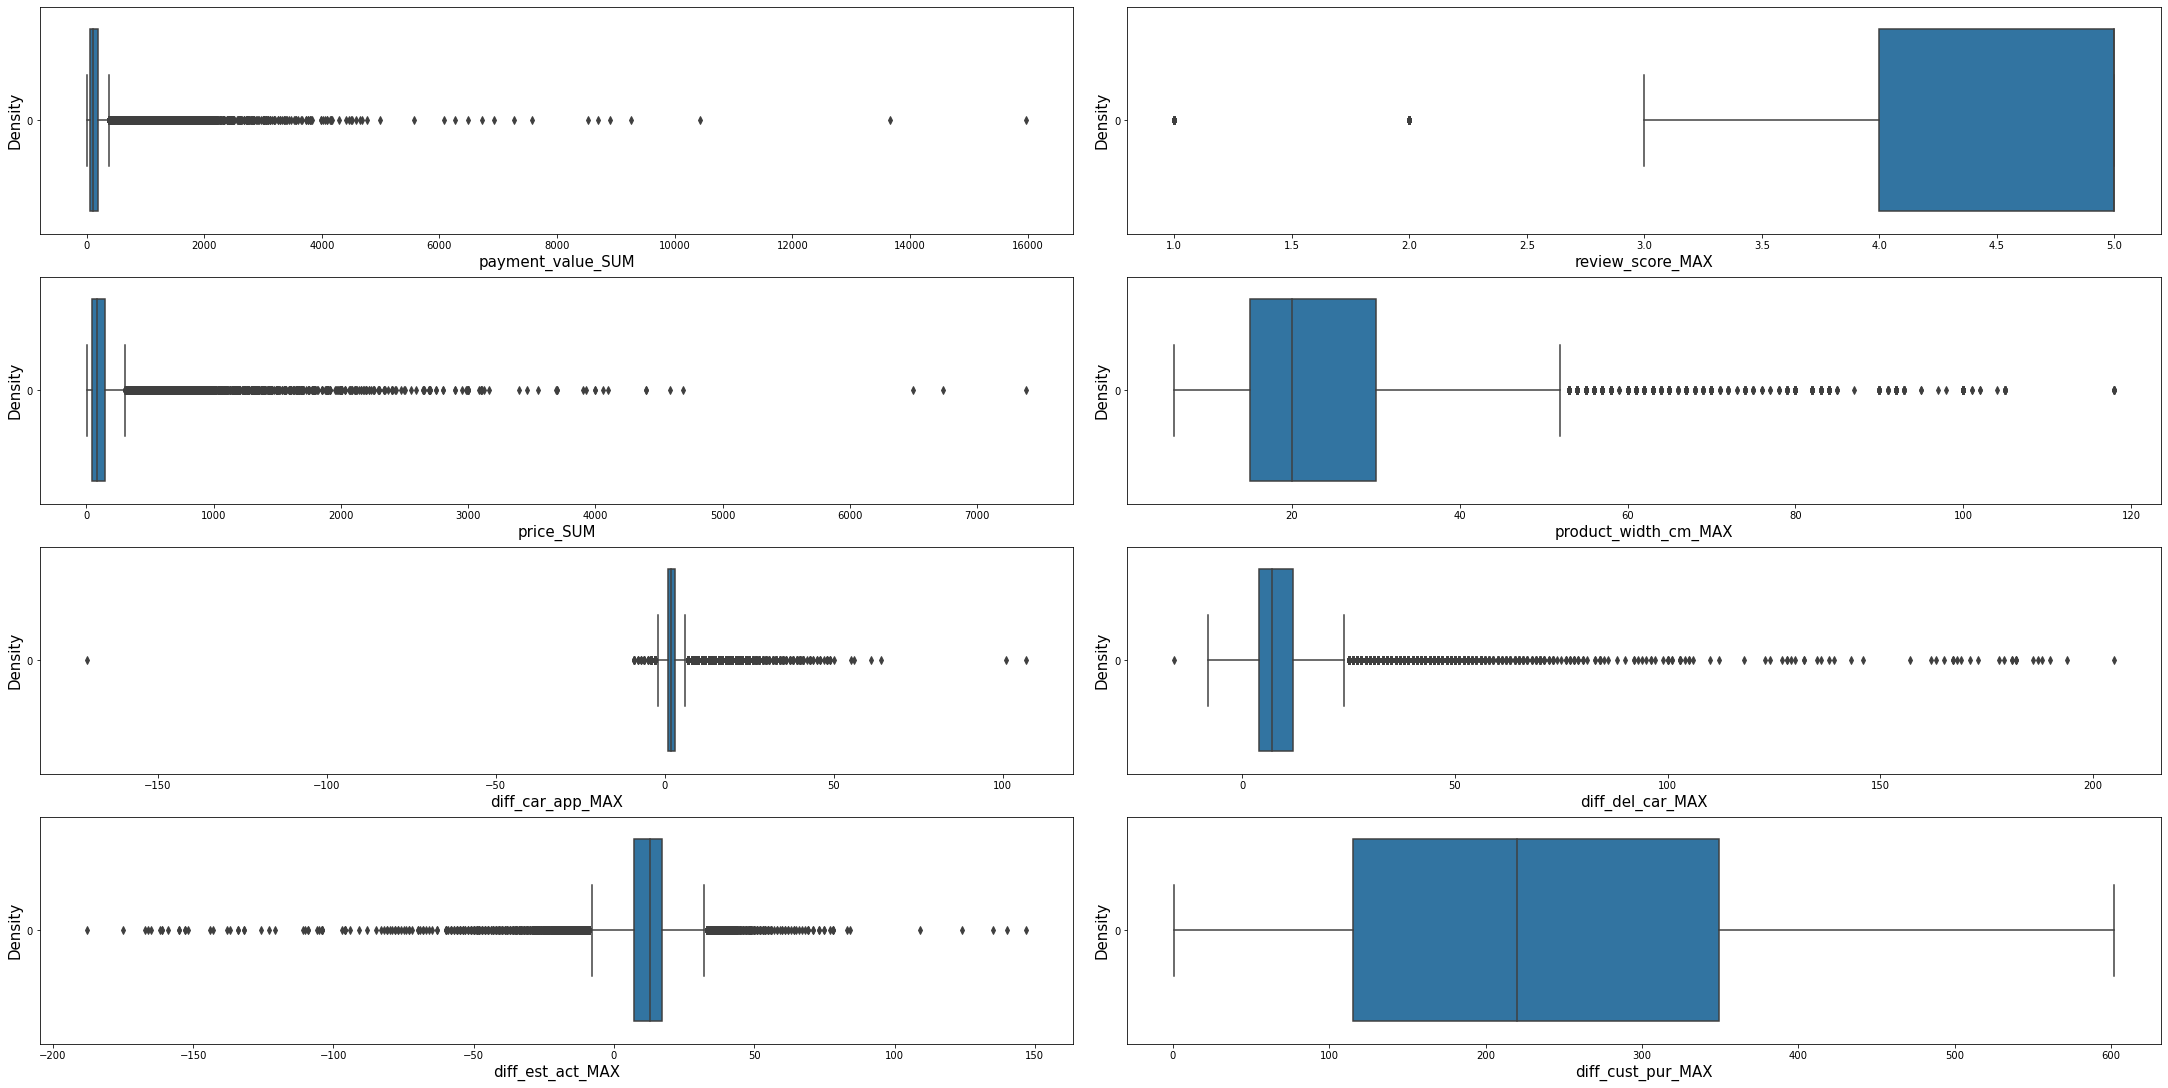

In [82]:
plot_density(df_clients, columns = cols, dt = DensityTypes.Boxplot)

/opt/anaconda3/envs/oc4/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/envs/oc4/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/envs/oc4/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility)

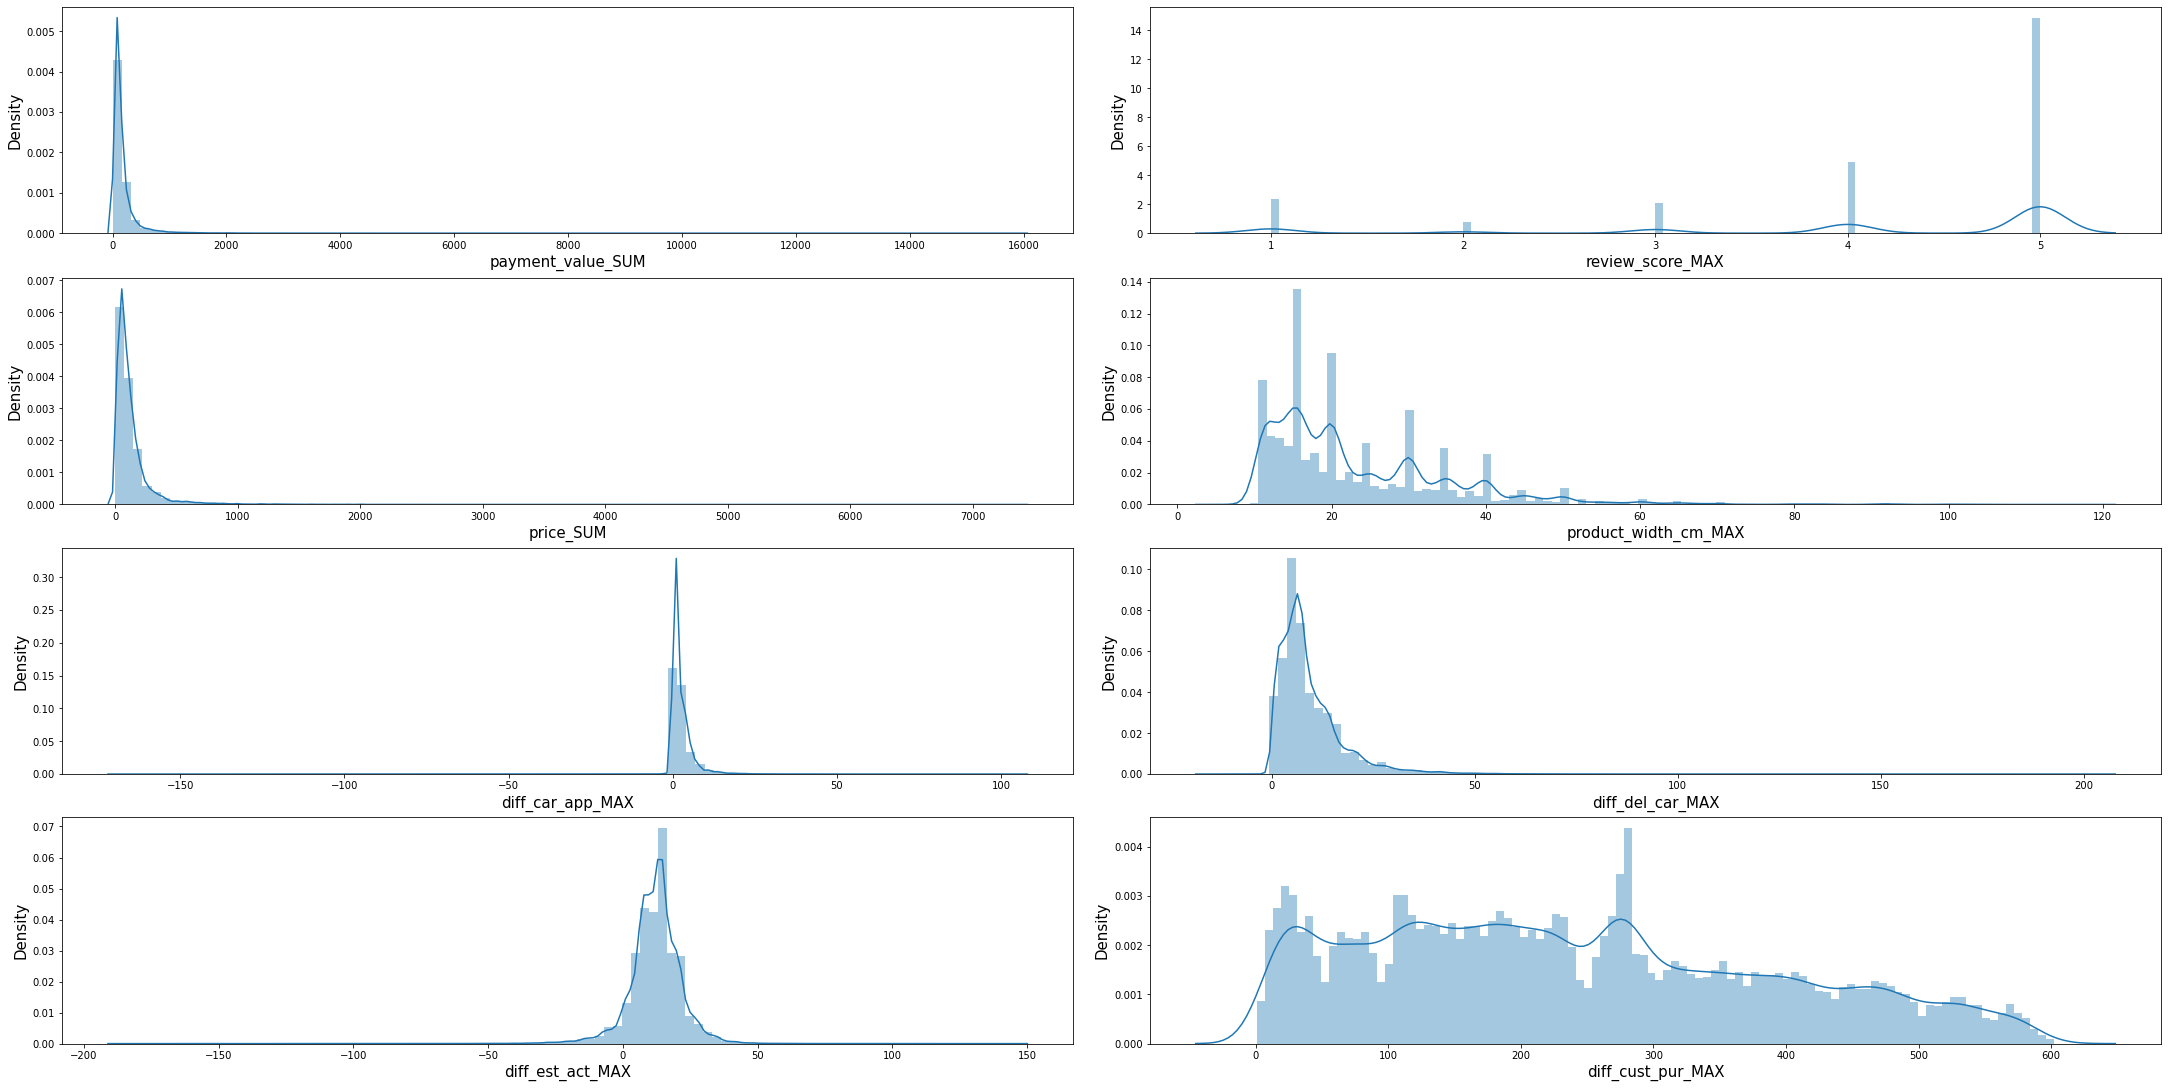

In [83]:
plot_density(df_clients, columns = cols, dt = DensityTypes.Density)

Here we observe that `diff_car_app_MAX` the difference between the time the order was approved and the time the order was delivered to the logistic partner in days has negative values meaning the order was approved before it was delivered to the logistic partner. This is not logic so cleaning this data might be logic.
Now `diff_del_car_MAX` the time taken between when the order was delivered to the customer after the order was delivered to the logistic partner in days can't be less then 0. Meaning that the delivering date to the customer must be greater than delivering date to logistic partner.
Also observe that `diff_est_act` that is the difference between the estimated date of arrival and the actual date of arrival in days can be negative, meaning that the product was delivered much faster.

In [84]:
df_clients = df_clients[df_clients['diff_car_app_MAX'] > 0]
df_clients = df_clients[df_clients['diff_del_car_MAX'] > 0]

/opt/anaconda3/envs/oc4/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/envs/oc4/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/envs/oc4/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility)

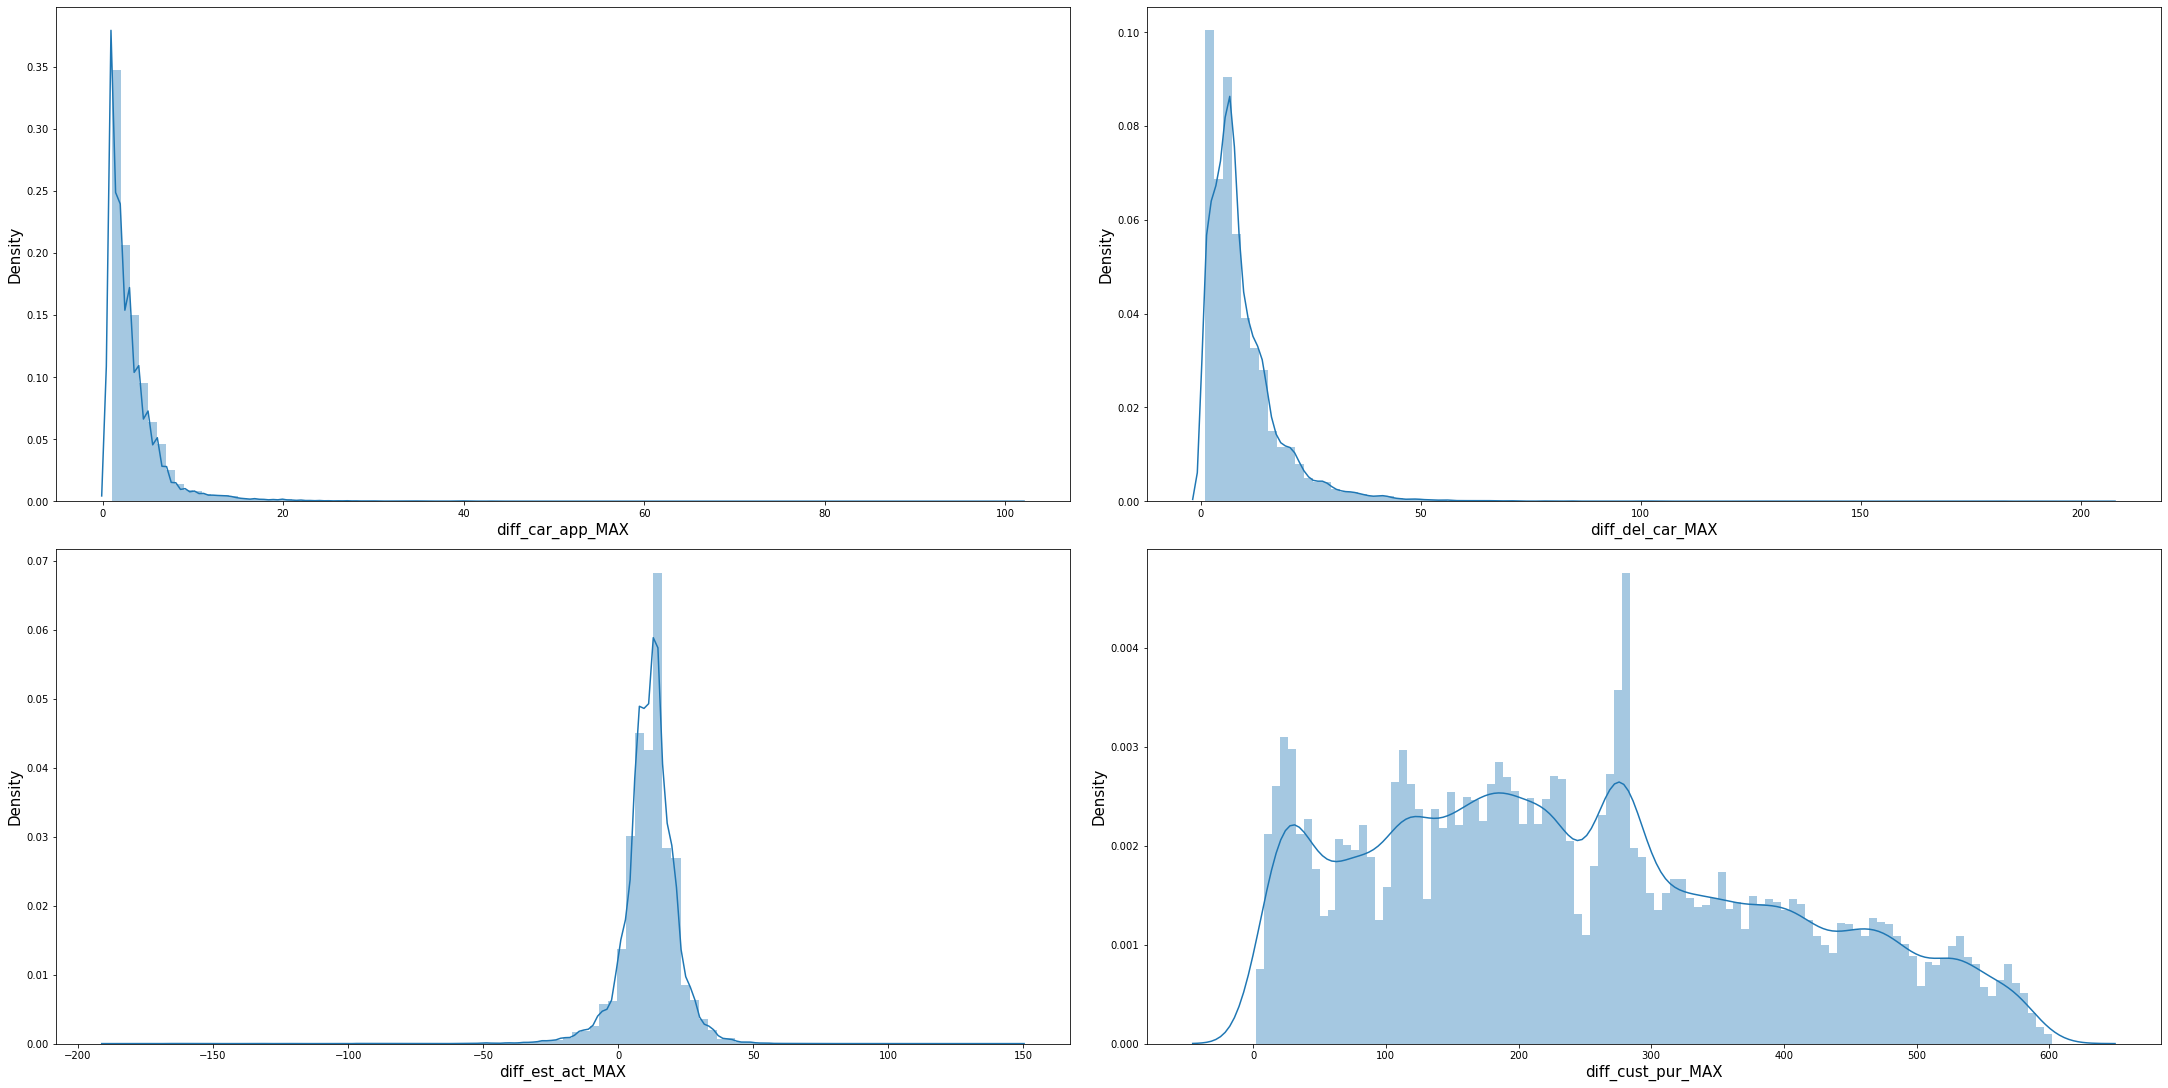

In [85]:
plot_density(df_clients, columns = [ 'diff_car_app_MAX', 'diff_del_car_MAX', 'diff_est_act_MAX',  'diff_cust_pur_MAX'], dt = DensityTypes.Density)

Know we will see the correlation between the created variables and try to simplify the dataset by removing the features with high corelation between each other.

In [86]:
df_clients_corr = df_clients.corr()

<Figure size 2160x1440 with 0 Axes>

<AxesSubplot:>

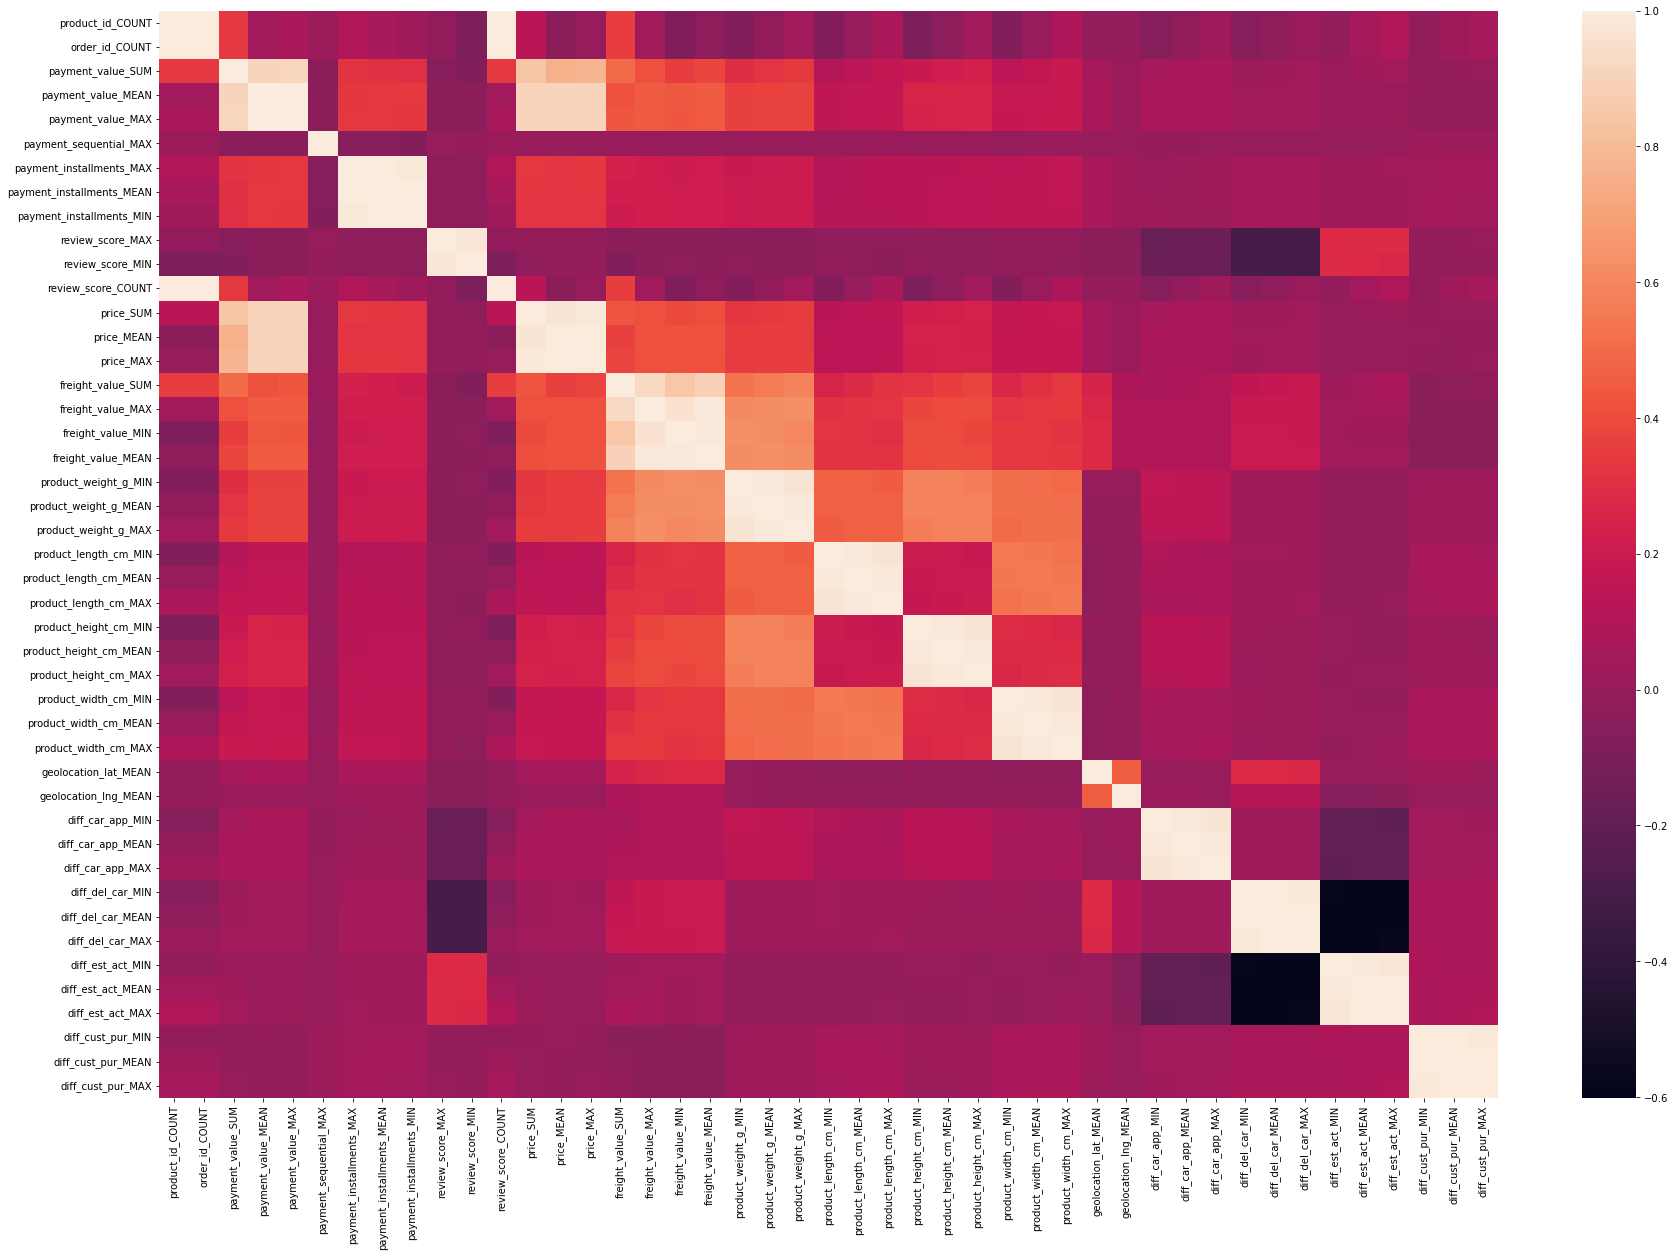

In [87]:
plt.figure(figsize=(30,20))
sns.heatmap(df_clients_corr)

In [88]:
df_clients = remove_columns_regarding_correlation(df_clients, df_clients_corr, hdc_make=False, hc_make=True)

<Figure size 2160x1440 with 0 Axes>

<AxesSubplot:>

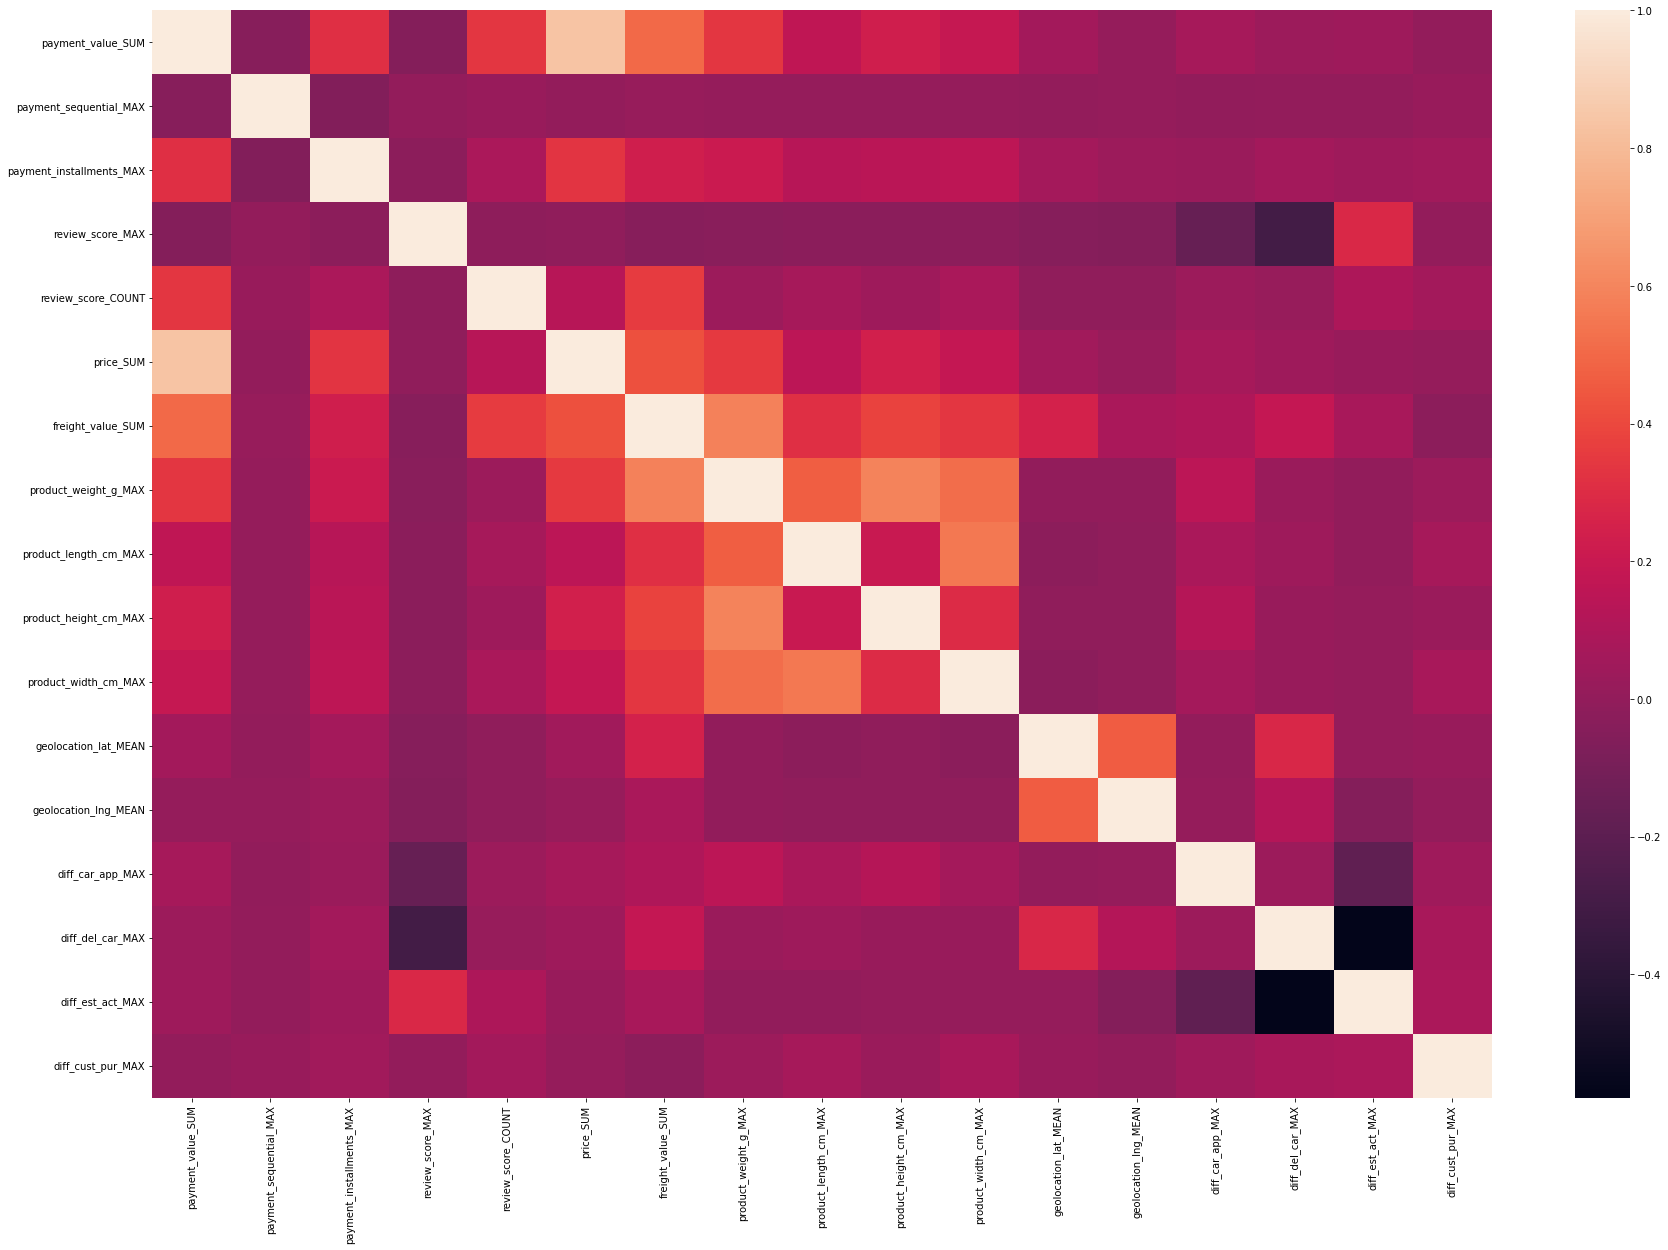

In [89]:
plt.figure(figsize=(30,20))
sns.heatmap(df_clients.corr())

In [90]:
plot_correlation(df_clients)

,payment_value_SUM,payment_sequential_MAX,payment_installments_MAX,review_score_MAX,review_score_COUNT,price_SUM,freight_value_SUM,product_weight_g_MAX,product_length_cm_MAX,product_height_cm_MAX,product_width_cm_MAX,geolocation_lat_MEAN,geolocation_lng_MEAN,diff_car_app_MAX,diff_del_car_MAX,diff_est_act_MAX,diff_cust_pur_MAX
payment_value_SUM,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
payment_sequential_MAX,-0.037298,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
payment_installments_MAX,0.312944,-0.060433,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
review_score_MAX,-0.053423,0.001095,-0.021523,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
review_score_COUNT,0.335763,0.020085,0.091883,-0.015248,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
price_SUM,0.838153,0.005982,0.331038,-0.010440,0.135541,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
freight_value_SUM,0.505163,0.013178,0.230952,-0.041921,0.352509,0.425212,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
product_weight_g_MAX,0.338462,0.010940,0.205418,-0.034165,0.037526,0.351095,0.583540,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
product_length_cm_MAX,0.163193,0.012944,0.130755,-0.024298,0.072530,0.151740,0.313411,0.469151,nan,nan,nan,nan,nan,nan,nan,nan,nan
product_height_cm_MAX,0.233259,0.012300,0.143846,-0.024409,0.038577,0.239095,0.379436,0.586915,0.203085,nan,nan,nan,nan,nan,nan,nan,nan


In [91]:
df_clients.shape

(76012, 22)

# Saving the dataset

In [92]:
df_clients.to_csv("data/df_clients.csv", index=False)